In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('darkgrid')

pd.set_option('display.max_columns', 100)

In [4]:
sp=pd.read_csv('Most Streamed Spotify Songs 2024.csv',encoding='unicode_escape')
df=sp.copy() # for backup purpose 

In [5]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [5]:
df.shape

(4600, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [7]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

                         index     0
0                        Track     0
1                   Album Name     0
2                       Artist     5
3                 Release Date     0
4                         ISRC     0
5                All Time Rank     0
6                  Track Score     0
7              Spotify Streams   113
8       Spotify Playlist Count    70
9       Spotify Playlist Reach    72
10          Spotify Popularity   804
11               YouTube Views   308
12               YouTube Likes   315
13                TikTok Posts  1173
14                TikTok Likes   980
15                TikTok Views   981
16      YouTube Playlist Reach  1009
17  Apple Music Playlist Count   561
18               AirPlay Spins   498
19              SiriusXM Spins  2123
20       Deezer Playlist Count   921
21       Deezer Playlist Reach   928
22       Amazon Playlist Count  1055
23             Pandora Streams  1106
24      Pandora Track Stations  1268
25          Soundcloud Streams  3333
2

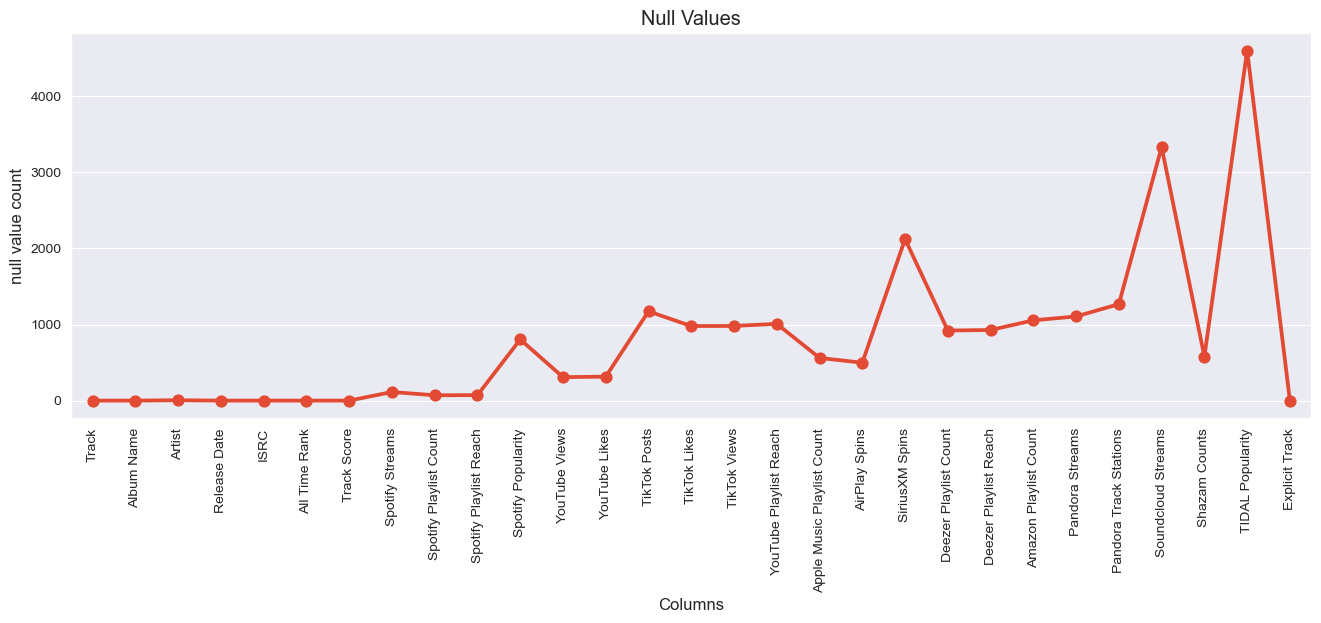

In [6]:
missingData = pd.DataFrame((df.isnull().sum())).reset_index()
print(missingData)
plt.figure(figsize=(16,5))
ax=sns.pointplot(x='index',y=0,data=missingData)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('null value count')
plt.title('Null Values')
plt.show()

In [7]:
df.drop(['TIDAL Popularity','ISRC','All Time Rank','AirPlay Spins','SiriusXM Spins','Amazon Playlist Count','Pandora Streams',
           'Pandora Track Stations','Soundcloud Streams','Shazam Counts'],axis=1,inplace=True)

df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'Deezer Playlist Count',
       'Deezer Playlist Reach', 'Explicit Track'],
      dtype='object')

In [9]:
df.shape

(4600, 19)

In [8]:
df.dropna(thresh=len(df.columns)-5,inplace=True) #thresh parameter value decides the minimum number of non-NAN values needed in a "ROW" not to drop.
df.fillna(0,inplace=True)

In [9]:
df.shape

(4075, 19)

In [10]:
def modify(df,cols):
    for col in cols:
        if df[col].dtypes==object:
            df[col]=df[col].str.replace(",","").apply(pd.to_numeric,errors='coerce')
    return df

In [11]:
converted_columns = ['Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes','TikTok Views',
                 'TikTok Posts','TikTok Likes','YouTube Playlist Reach','Apple Music Playlist Count','Deezer Playlist Count'
                  ,'Deezer Playlist Reach']
df=modify(df,converted_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4075 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4075 non-null   object 
 1   Album Name                  4075 non-null   object 
 2   Artist                      4075 non-null   object 
 3   Release Date                4075 non-null   object 
 4   Track Score                 4075 non-null   float64
 5   Spotify Streams             4067 non-null   float64
 6   Spotify Playlist Count      4075 non-null   int64  
 7   Spotify Playlist Reach      4075 non-null   int64  
 8   Spotify Popularity          4075 non-null   float64
 9   YouTube Views               4025 non-null   float64
 10  YouTube Likes               4021 non-null   float64
 11  TikTok Posts                3382 non-null   float64
 12  TikTok Likes                3574 non-null   float64
 13  TikTok Views                3573 non-n

In [12]:
for col in df.columns:
    if df[col].dtypes!=object:
        df.fillna(0,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4075 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4075 non-null   object 
 1   Album Name                  4075 non-null   object 
 2   Artist                      4075 non-null   object 
 3   Release Date                4075 non-null   object 
 4   Track Score                 4075 non-null   float64
 5   Spotify Streams             4075 non-null   float64
 6   Spotify Playlist Count      4075 non-null   int64  
 7   Spotify Playlist Reach      4075 non-null   int64  
 8   Spotify Popularity          4075 non-null   float64
 9   YouTube Views               4075 non-null   float64
 10  YouTube Likes               4075 non-null   float64
 11  TikTok Posts                4075 non-null   float64
 12  TikTok Likes                4075 non-null   float64
 13  TikTok Views                4075 non-n

In [14]:
for col in df.columns:
    if df[col].dtypes==float:
        df[col]=df[col].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4075 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Track                       4075 non-null   object
 1   Album Name                  4075 non-null   object
 2   Artist                      4075 non-null   object
 3   Release Date                4075 non-null   object
 4   Track Score                 4075 non-null   int32 
 5   Spotify Streams             4075 non-null   int32 
 6   Spotify Playlist Count      4075 non-null   int64 
 7   Spotify Playlist Reach      4075 non-null   int64 
 8   Spotify Popularity          4075 non-null   int32 
 9   YouTube Views               4075 non-null   int32 
 10  YouTube Likes               4075 non-null   int32 
 11  TikTok Posts                4075 non-null   int32 
 12  TikTok Likes                4075 non-null   int32 
 13  TikTok Views                4075 non-null   int32 
 1

In [14]:
df.isnull().sum()

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Explicit Track                0
dtype: int64

In [15]:
df.duplicated().value_counts()

False    4073
True        2
Name: count, dtype: int64

In [15]:
df.drop_duplicates(inplace=True)


In [17]:
df.duplicated().sum()

0

In [16]:
df.columns=[col.replace(" ","_") for col in df.columns]
df.head()

,Track,Album_Name,Artist,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,-2147483648,150597040,210,62,17598718,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,188,67,10422430,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,-2147483648,373784955,190,136,36321847,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,-2147483648,-2147483648,394,264,24684248,0
4,Houdini,Houdini,Eminem,5/31/2024,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,182,82,17660624,1


In [17]:
df.loc[df['Explicit_Track']==1,'Explicit_Track']='True'
df.loc[df['Explicit_Track']==0,'Explicit_Track']='False'

In [18]:
df['Release_Date']=pd.to_datetime(df['Release_Date'],format='%m/%d/%Y')

In [19]:
df.head()

,Track,Album_Name,Artist,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,-2147483648,150597040,210,62,17598718,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,188,67,10422430,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,-2147483648,373784955,190,136,36321847,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,-2147483648,-2147483648,394,264,24684248,False
4,Houdini,Houdini,Eminem,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,182,82,17660624,True


In [20]:
for col in df.columns:
    if np.issubdtype(df[col].dtype,np.number):
        df[col]=df[col].apply(lambda x: abs(x) if x<0 else x)
df.head()

,Track,Album_Name,Artist,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,2147483648,150597040,210,62,17598718,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,188,67,10422430,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,2147483648,373784955,190,136,36321847,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,2147483648,2147483648,394,264,24684248,False
4,Houdini,Houdini,Eminem,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,182,82,17660624,True


In [34]:
df.insert(4,'year',df['Release_Date'].dt.year)
df.insert(5,'month',df['Release_Date'].dt.month_name())

In [35]:
df.head()

,Track,Album_Name,Artist,Release_Date,year,month,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track,Total_Streams,Playlists_Count
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,2024,April,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,2147483648,150597040,210,62,17598718,False,2622229338,30988
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2024,May,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,188,67,10422430,True,648389949,28368
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,2024,March,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,2147483648,373784955,190,136,36321847,False,2871392047,54657
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,2023,January,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,2147483648,2147483648,394,264,24684248,False,5274865180,270460
4,Houdini,Houdini,Eminem,2024-05-31,2024,May,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,182,82,17660624,True,184408879,7487


In [21]:
df['Total_Streams']=df['Spotify_Streams'] + df['YouTube_Views'] + df['TikTok_Views']
df['Playlists_Count'] = df['Deezer_Playlist_Count'] + df['Apple_Music_Playlist_Count'] + df['Spotify_Playlist_Count']
df.head()

,Track,Album_Name,Artist,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track,Total_Streams,Playlists_Count
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,2147483648,150597040,210,62,17598718,False,2622229338,30988
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,188,67,10422430,True,648389949,28368
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,2147483648,373784955,190,136,36321847,False,2871392047,54657
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,2147483648,2147483648,394,264,24684248,False,5274865180,270460
4,Houdini,Houdini,Eminem,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,182,82,17660624,True,184408879,7487


In [23]:
df.describe()

,Release_Date,year,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Total_Streams,Playlists_Count
count,4073,4073.000000,4073.000000,4.073000e+03,4073.000000,4.073000e+03,4073.000000,4.073000e+03,4.073000e+03,4.073000e+03,4.073000e+03,4.073000e+03,4.073000e+03,4073.000000,4073.000000,4.073000e+03,4.073000e+03,4073.000000
mean,2020-11-03 14:12:03.005156096,2020.382274,41.396023,4.524323e+08,65735.576479,2.565380e+07,57.966118,3.579684e+08,2.913312e+06,7.444444e+05,8.693048e+07,5.296345e+08,2.649642e+08,53.204272,29.042966,1.155703e+06,1.340035e+09,65817.823717
min,1987-07-21 00:00:00,1987.000000,19.000000,0.000000e+00,2.000000,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,4.206000e+04,2.000000
25%,2019-04-09 00:00:00,2019.000000,23.000000,8.877170e+07,12008.000000,6.701830e+06,57.000000,3.844251e+07,3.958960e+05,5.548000e+03,1.794140e+06,1.931713e+07,1.488303e+06,9.000000,3.000000,2.083100e+04,3.071614e+08,12038.000000
50%,2022-02-25 00:00:00,2022.000000,30.000000,2.584398e+08,39852.000000,1.522822e+07,66.000000,1.428209e+08,1.250134e+06,9.713600e+04,1.869163e+07,1.815420e+08,4.521253e+07,26.000000,12.000000,1.750160e+05,9.778830e+08,39871.000000
75%,2023-06-30 00:00:00,2023.000000,44.000000,6.462953e+08,93752.000000,3.233200e+07,72.000000,4.519224e+08,3.560319e+06,5.428000e+05,7.853380e+07,7.453396e+08,2.546539e+08,68.000000,34.000000,7.419310e+05,2.121865e+09,93789.000000
max,2024-06-12 00:00:00,2024.000000,725.000000,2.147484e+09,590392.000000,2.623434e+08,96.000000,2.147484e+09,6.231118e+07,3.772646e+07,2.147484e+09,2.147484e+09,2.147484e+09,859.000000,632.000000,4.819785e+07,6.442451e+09,591815.000000
std,NaN,3.674829,38.258653,4.989421e+08,72233.019985,3.032025e+07,23.960805,5.031821e+08,4.614672e+06,2.117730e+06,2.045192e+08,7.089159e+08,4.993742e+08,71.606269,52.508324,3.395859e+06,1.245057e+09,72312.875748


In [24]:
df.describe(include='object')

,Track,Album_Name,Artist,month,Explicit_Track
count,4073,4073,4073,4073,4073
unique,3950,3565,1705,12,2
top,ýýýýýýýýýýýý,Un Verano Sin Ti,Drake,January,False
freq,7,20,59,463,2532


In [16]:
df.head()

,Track,Album_Name,Artist,Release_Date,year,month,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,...,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track,Total_Streams,Playlists_Count
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,2024,April,725,390470936,30716,196631588,...,5767700,651565900,2147483648,150597040,210,62,17598718,False,2622229338,30988
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2024,May,545,323703884,28113,174597137,...,674700,35223547,208339025,156380351,188,67,10422430,True,648389949,28368
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,2024,March,538,601309283,54331,211607669,...,3025400,275154237,2147483648,373784955,190,136,36321847,False,2871392047,54657
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,2023,January,444,2031280633,269802,136569078,...,7189811,1078757968,2147483648,2147483648,394,264,24684248,False,5274865180,270460
4,Houdini,Houdini,Eminem,2024-05-31,2024,May,423,107034922,7223,151469874,...,16400,0,0,112763851,182,82,17660624,True,184408879,7487


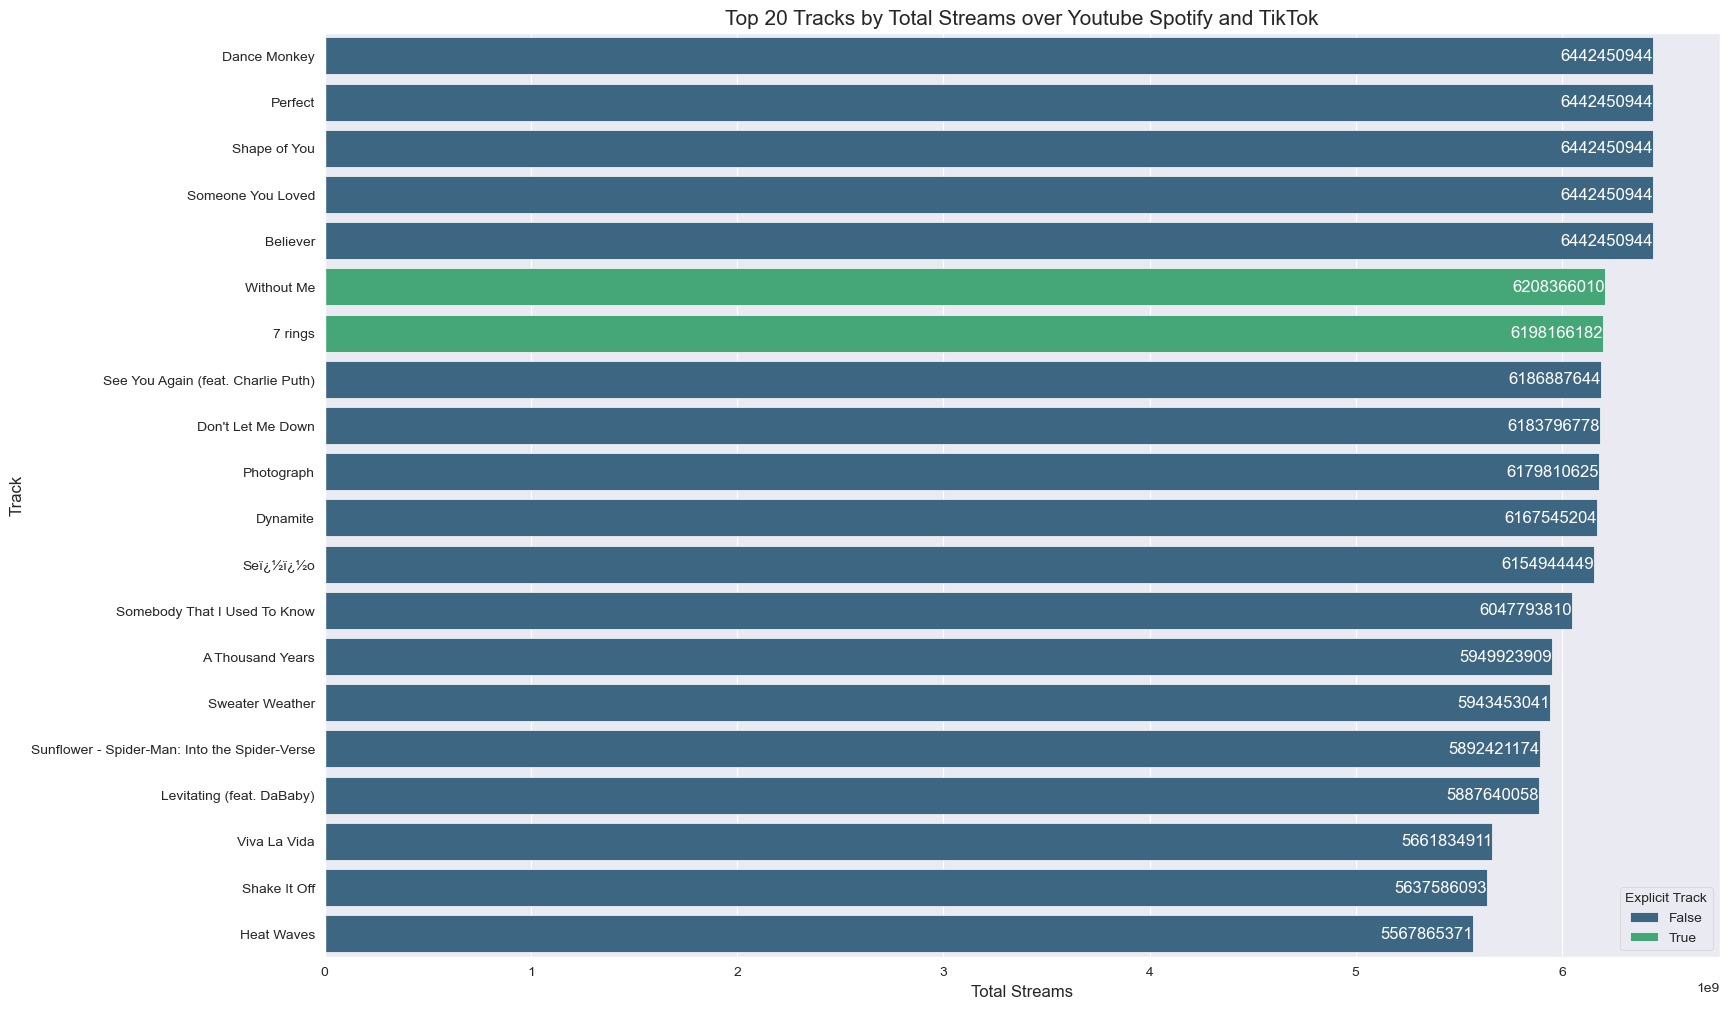

In [22]:
track_total_streams=df.sort_values(by='Total_Streams',ascending=False).head(20)
plt.figure(figsize=(18,12))
sns.barplot(x='Total_Streams',y='Track',data=track_total_streams,hue='Explicit_Track',palette='viridis')
plt.xlabel('Total Streams')
plt.ylabel('Track')
plt.title('Top 20 Tracks by Total Streams over Youtube Spotify and TikTok', fontsize=15)
plt.legend(title='Explicit Track')
for index, value in enumerate(track_total_streams['Total_Streams']):
    plt.text(value, index, f'{value}', va='center', ha='right', fontsize=12,color='white')
plt.show()

##### Conclusion - The most streamed songs on YouTube, Spotify, and TikTok combined are (Dance monkey, Perfect, Shape of you, Someone You loved and Believer).

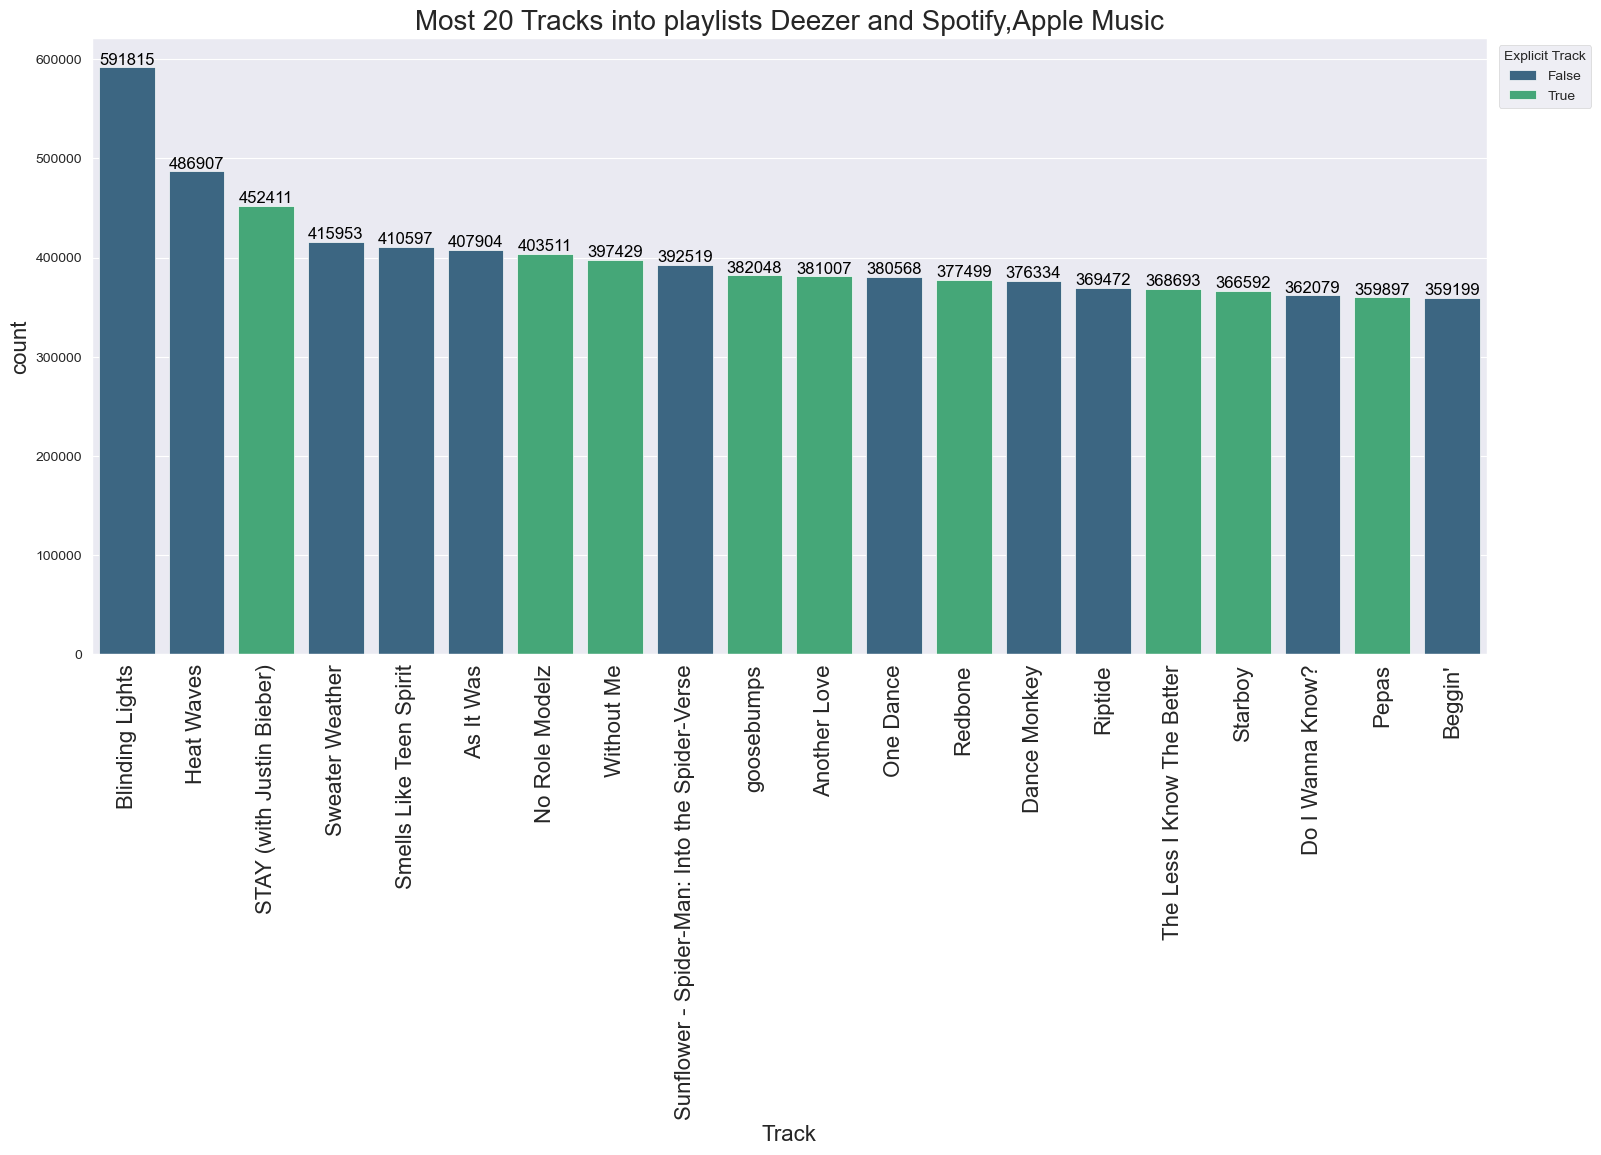

In [23]:
track_playlist=df.sort_values(by='Playlists_Count',ascending=False).head(20)
plt.figure(figsize=(18,8))
sns.barplot(x='Track',y='Playlists_Count',data=track_playlist,hue='Explicit_Track',palette='viridis')
plt.xlabel('Track',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.title('Most 20 Tracks into playlists Deezer and Spotify,Apple Music', fontsize=20)
plt.legend(title='Explicit Track', loc='upper right', bbox_to_anchor=(1.08,1))
plt.xticks(rotation=90,fontsize=16)

for index, value in enumerate(track_playlist['Playlists_Count']):
    plt.text(index, value, f'{value}', va='bottom', ha='center', fontsize=12, color='black')

plt.show()

##### Conclusion - The most popular Track on playlists on YouTube, Spotify, and TikTok combined is Binding lights

In [39]:
df.head()

,Track,Album_Name,Artist,Release_Date,year,month,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,...,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track,Total_Streams,Playlists_Count
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,2024,April,725,390470936,30716,196631588,...,5767700,651565900,2147483648,150597040,210,62,17598718,False,2622229338,30988
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2024,May,545,323703884,28113,174597137,...,674700,35223547,208339025,156380351,188,67,10422430,True,648389949,28368
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,2024,March,538,601309283,54331,211607669,...,3025400,275154237,2147483648,373784955,190,136,36321847,False,2871392047,54657
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,2023,January,444,2031280633,269802,136569078,...,7189811,1078757968,2147483648,2147483648,394,264,24684248,False,5274865180,270460
4,Houdini,Houdini,Eminem,2024-05-31,2024,May,423,107034922,7223,151469874,...,16400,0,0,112763851,182,82,17660624,True,184408879,7487


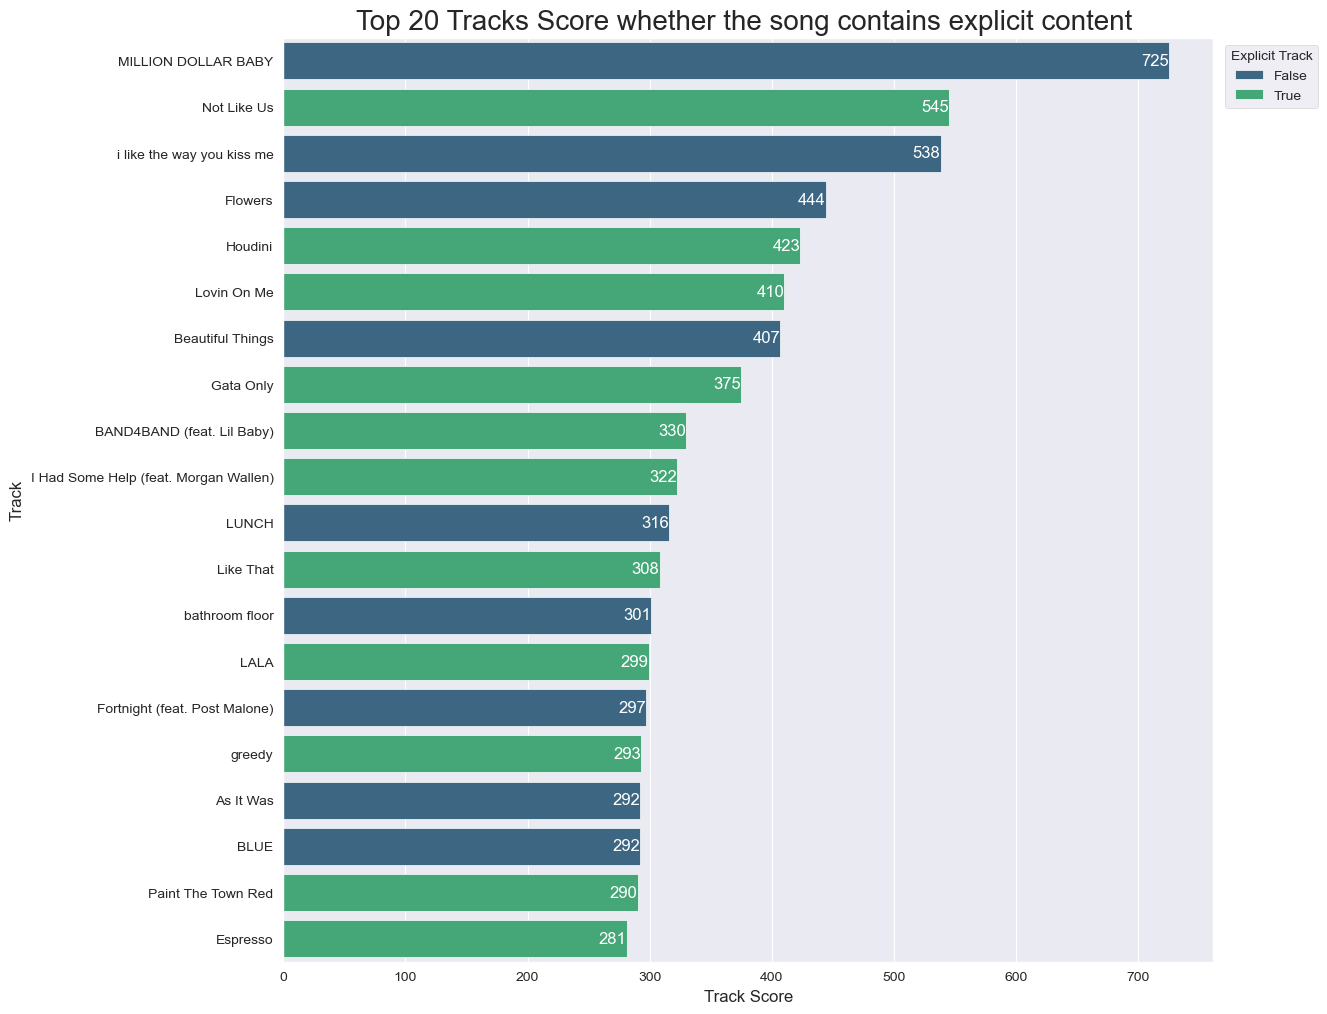

In [24]:
track_score=df.sort_values(by='Track_Score',ascending=False).head(20)
plt.figure(figsize=(12, 12))
sns.barplot(x='Track_Score',y='Track',data=track_score,hue='Explicit_Track',palette='viridis')
plt.xlabel('Track Score')
plt.ylabel('Track')
plt.title('Top 20 Tracks Score whether the song contains explicit content ', fontsize=20)
plt.legend(title='Explicit Track', loc='upper right', bbox_to_anchor=(1.12,1))

for index, value in enumerate(track_score['Track_Score']):
    plt.text(value, index, f'{value}', va='center',ha='right', fontsize=12, color='white')

plt.show()

##### Conclusion - The track with most score is (Million Dollar Baby).

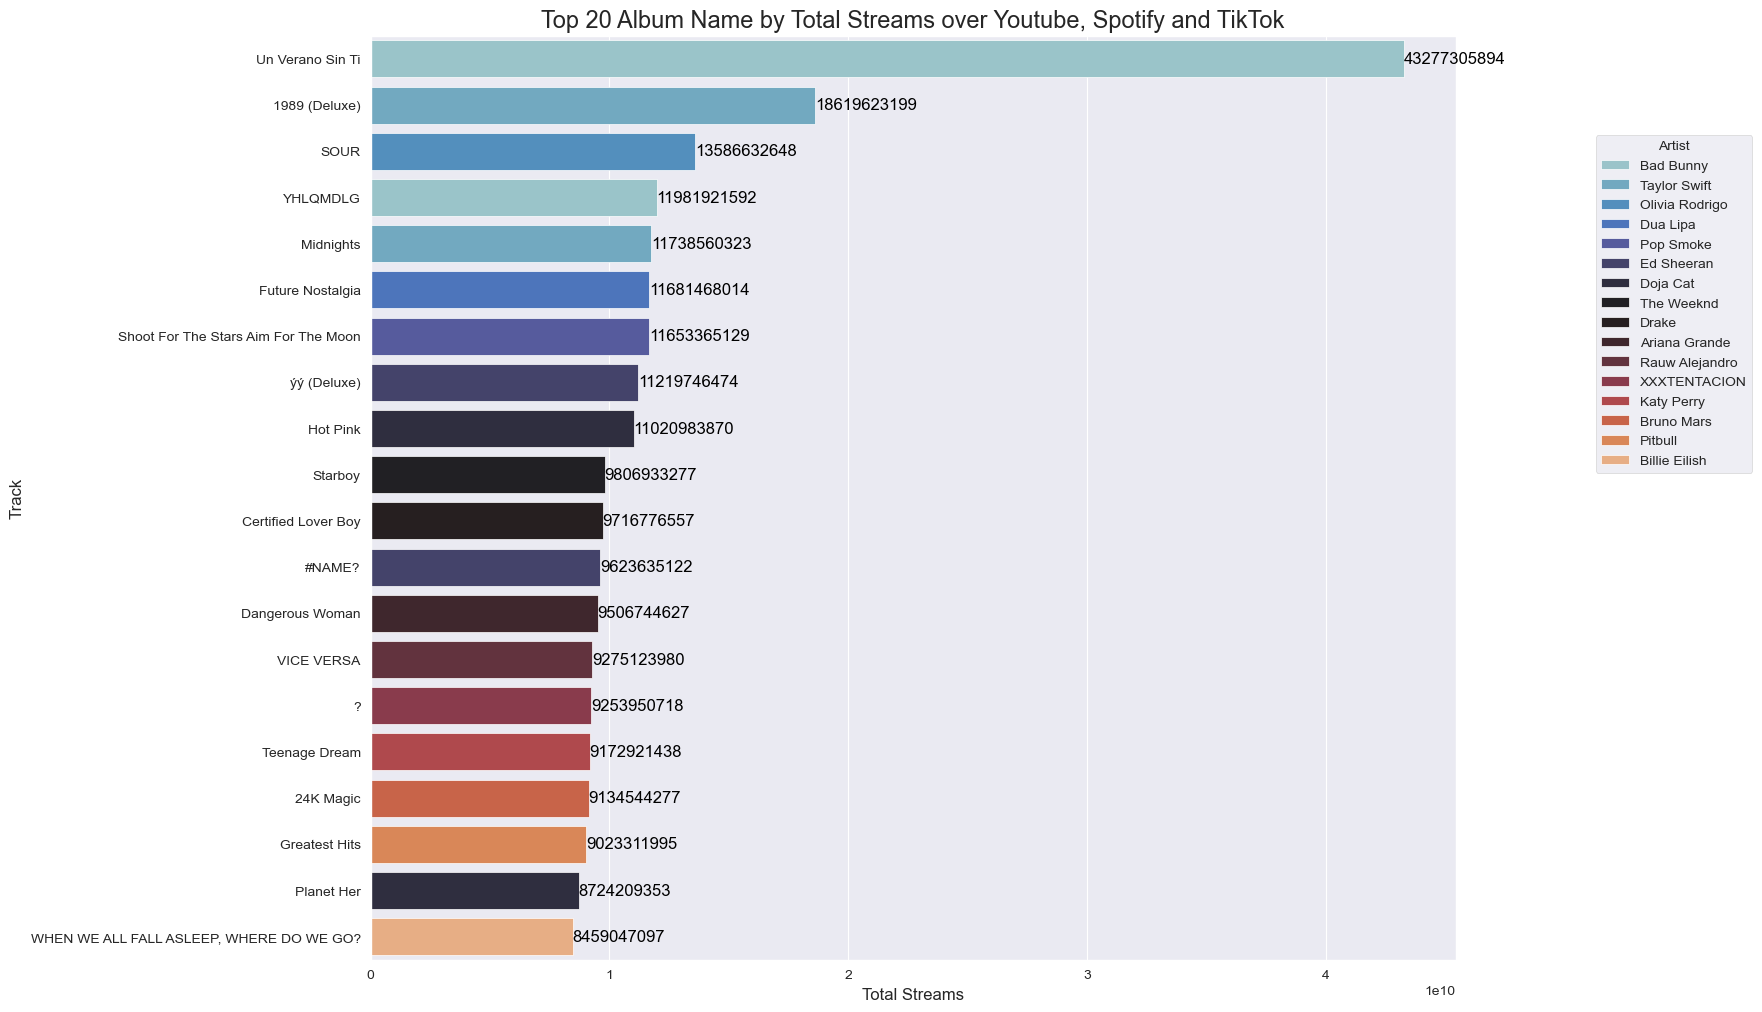

In [25]:
Album_Streames = df.groupby(['Album_Name','Artist'],as_index=False)['Total_Streams'].sum()
Album_Streames = Album_Streames.sort_values(by='Total_Streams',ascending=False).head(20)
plt.figure(figsize=(14,12))
sns.barplot(x='Total_Streams',y='Album_Name',data=Album_Streames,hue='Artist',palette='icefire')
plt.xlabel('Total Streams')
plt.ylabel('Track')
plt.title('Top 20 Album Name by Total Streams over Youtube, Spotify and TikTok', fontsize=17)
plt.legend(title='Artist', loc='upper right', bbox_to_anchor=(1.28,0.9))

for index, value in enumerate(Album_Streames['Total_Streams']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black')

plt.show()

##### Conclusion - Most streamed album is (Un Verano Sin Ti) for Bad Bunny.

In [68]:
df.head()

,Track,Album_Name,Artist,Release_Date,year,month,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,...,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track,Total_Streams,Playlists_Count
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,2024,April,725,390470936,30716,196631588,...,5767700,651565900,2147483648,150597040,210,62,17598718,False,2622229338,30988
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2024,May,545,323703884,28113,174597137,...,674700,35223547,208339025,156380351,188,67,10422430,True,648389949,28368
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,2024,March,538,601309283,54331,211607669,...,3025400,275154237,2147483648,373784955,190,136,36321847,False,2871392047,54657
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,2023,January,444,2031280633,269802,136569078,...,7189811,1078757968,2147483648,2147483648,394,264,24684248,False,5274865180,270460
4,Houdini,Houdini,Eminem,2024-05-31,2024,May,423,107034922,7223,151469874,...,16400,0,0,112763851,182,82,17660624,True,184408879,7487


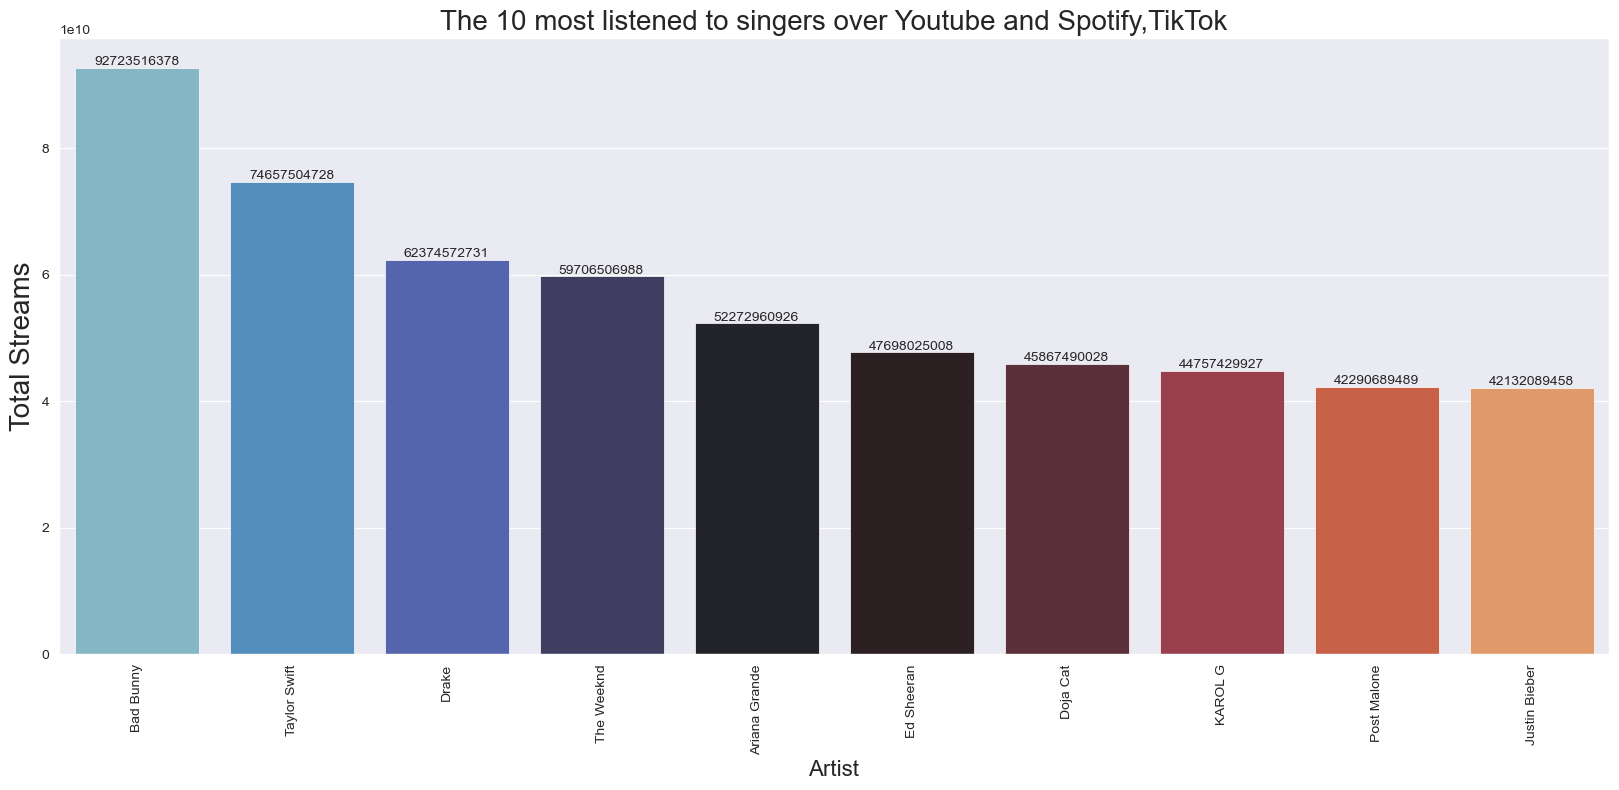

In [26]:
kalakar=df.groupby('Artist',as_index=False).agg({'Spotify_Streams':'sum','YouTube_Views':'sum','TikTok_Views':'sum','Total_Streams':'sum','Track_Score':'mean'})
total=kalakar.sort_values(by='Total_Streams',ascending=False).head(10)
fig,ax = plt.subplots(figsize=(20,8))
sns.barplot(x='Artist',y='Total_Streams',data=total,palette='icefire')
plt.xlabel('Artist',fontsize=16)
plt.ylabel('Total Streams',fontsize=20)
plt.title('The 10 most listened to singers over Youtube and Spotify,TikTok', fontsize=20)
plt.xticks(rotation=90)

for index, value in enumerate(total['Total_Streams']):
    plt.text(index, value, f'{value}', ha='center', va='bottom')

plt.show()

##### Conclusion - The two most listened to artists of all time are:Bad Bunny and Taylor Swift respectively.

In [81]:
df.head()

,Track,Album_Name,Artist,Release_Date,year,month,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,...,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track,Total_Streams,Playlists_Count
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,2024,April,725,390470936,30716,196631588,...,5767700,651565900,2147483648,150597040,210,62,17598718,False,2622229338,30988
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2024,May,545,323703884,28113,174597137,...,674700,35223547,208339025,156380351,188,67,10422430,True,648389949,28368
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,2024,March,538,601309283,54331,211607669,...,3025400,275154237,2147483648,373784955,190,136,36321847,False,2871392047,54657
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,2023,January,444,2031280633,269802,136569078,...,7189811,1078757968,2147483648,2147483648,394,264,24684248,False,5274865180,270460
4,Houdini,Houdini,Eminem,2024-05-31,2024,May,423,107034922,7223,151469874,...,16400,0,0,112763851,182,82,17660624,True,184408879,7487


In [94]:
kalakar

,Artist,Spotify_Streams,YouTube_Views,TikTok_Views,Total_Streams,Track_Score
0,$OHO BANI,54065563,6744201,0,60809764,23.000
1,$uicideboy$,1684158084,690965718,567271433,2942395235,26.125
2,&ME,34601626,0,869444,35471070,21.000
3,(G)I-DLE,876938452,1205238799,2254180234,4336357485,38.750
4,*NSYNC,69041864,27951941,57013361,154007166,21.000
...,...,...,...,...,...,...
1700,ýýýýýýýýýý,93100511,24316389,921489483,1038906383,51.000
1701,ýýýýýýýýýýýý,46945798,50822146,0,97767944,21.000
1702,ýýýýýýýýýýýý ýýýýýýýýýýýýýý,21970517,455300901,433329532,910600950,20.000
1703,ýýýýýýýýýýýýýýý(ýýýýýýýýýýýýýýý),548408,1356336,2147483648,2149388392,119.000


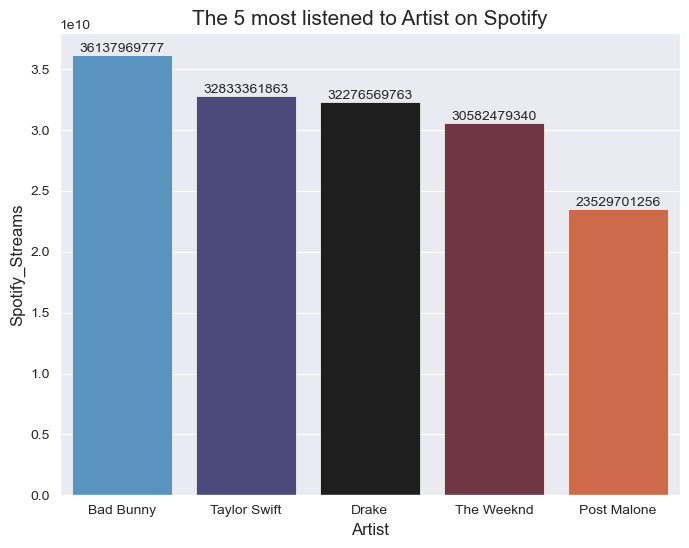

In [27]:
spotify=kalakar.sort_values(by='Spotify_Streams',ascending=False).head(5)
plt.figure(figsize=(8,6))
sns.barplot(x='Artist',y='Spotify_Streams',data=spotify,palette='icefire')
for index, value in enumerate(spotify['Spotify_Streams']):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('The 5 most listened to Artist on Spotify', fontsize=15)
plt.show()

##### conclusion - The most listened to artist on spotify is Bad Bunny

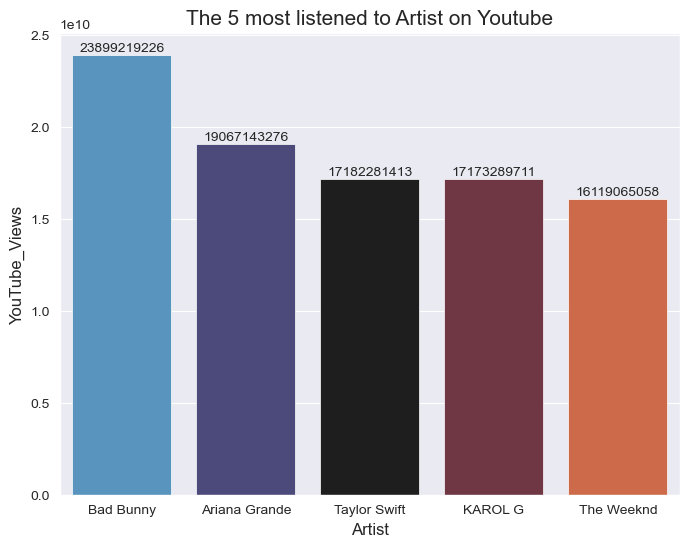

In [28]:
yt=kalakar.sort_values(by='YouTube_Views',ascending=False).head(5)
plt.figure(figsize=(8,6))
sns.barplot(x='Artist',y='YouTube_Views',data=yt,palette='icefire')
for index, value in enumerate(yt['YouTube_Views']):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('The 5 most listened to Artist on Youtube', fontsize=15)
plt.show()

##### conclusion - The most listened to artist on youtube is Bad Bunny

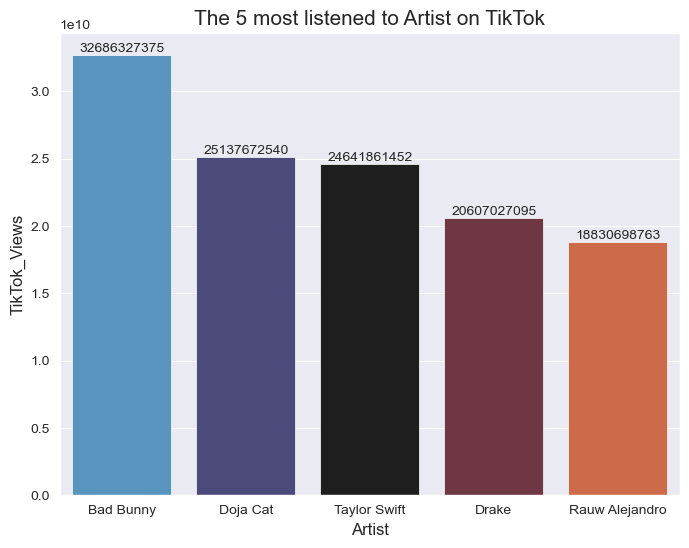

In [29]:
tt=kalakar.sort_values(by='TikTok_Views',ascending=False).head(5)
plt.figure(figsize=(8,6))
sns.barplot(x='Artist',y='TikTok_Views',data=tt,palette='icefire')
for index, value in enumerate(tt['TikTok_Views']):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('The 5 most listened to Artist on TikTok', fontsize=15)
plt.show()

##### conclusion - The most listened to artist on tiktok is Bad Bunny

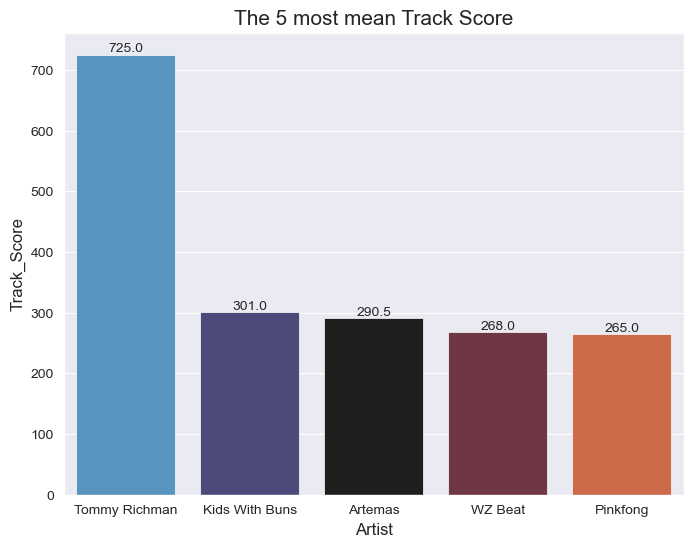

In [30]:
ts=kalakar.sort_values(by='Track_Score',ascending=False).head(5)
plt.figure(figsize=(8,6))
sns.barplot(x='Artist',y='Track_Score',data=ts,palette='icefire')
for index, value in enumerate(ts['Track_Score']):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('The 5 most mean Track Score', fontsize=15)
plt.show()

##### conclusion - Tommy Richman has the best Mean track score.

In [102]:
df.head()

,Track,Album_Name,Artist,Release_Date,year,month,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,...,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track,Total_Streams,Playlists_Count
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,2024,April,725,390470936,30716,196631588,...,5767700,651565900,2147483648,150597040,210,62,17598718,False,2622229338,30988
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2024,May,545,323703884,28113,174597137,...,674700,35223547,208339025,156380351,188,67,10422430,True,648389949,28368
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,2024,March,538,601309283,54331,211607669,...,3025400,275154237,2147483648,373784955,190,136,36321847,False,2871392047,54657
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,2023,January,444,2031280633,269802,136569078,...,7189811,1078757968,2147483648,2147483648,394,264,24684248,False,5274865180,270460
4,Houdini,Houdini,Eminem,2024-05-31,2024,May,423,107034922,7223,151469874,...,16400,0,0,112763851,182,82,17660624,True,184408879,7487


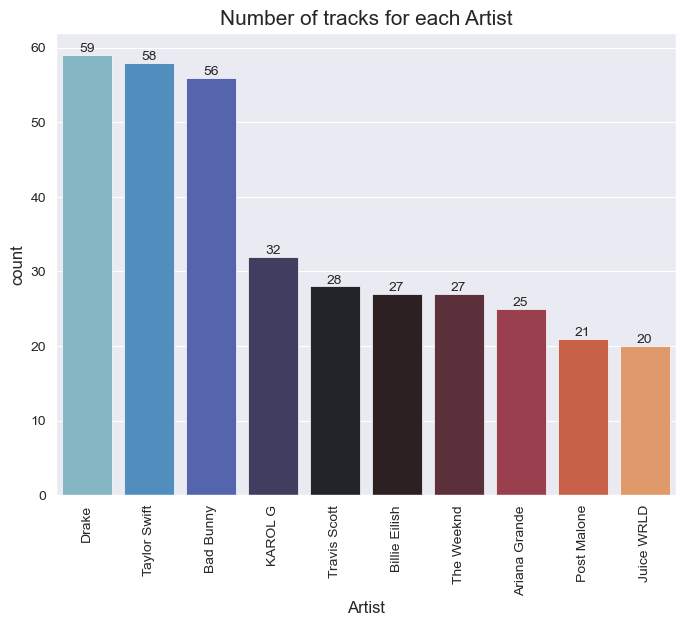

In [31]:
vc=df['Artist'].value_counts().head(10).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Artist',y='count',data=vc,palette='icefire')
for index, value in enumerate(vc['count']):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('Number of tracks for each Artist', fontsize=15)
plt.xticks(rotation=90)
plt.show()

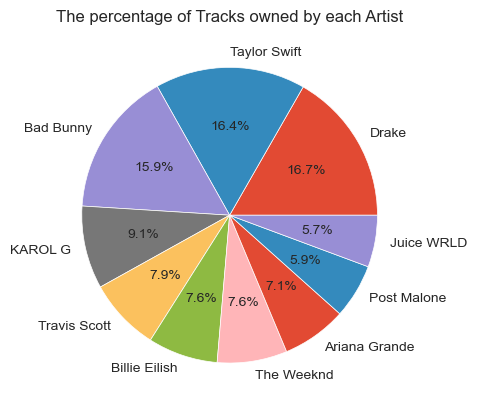

In [32]:
plt.pie(vc['count'],labels=vc.Artist,autopct='%1.1f%%')
plt.title('The percentage of Tracks owned by each Artist',fontsize=12)
plt.show()

In [36]:
yr=df.groupby('year',as_index=False)[['Spotify_Streams','YouTube_Views','TikTok_Views','Total_Streams']].agg(sum)
yr=yr.loc[yr['year']>2009]
yr=yr.loc[yr['year']<2024]
yr

,year,Spotify_Streams,YouTube_Views,TikTok_Views,Total_Streams
15,2010,26123996288,31206881150,16153133388,73484010826
16,2011,52588160364,45534358662,30914772642,129037291668
17,2012,55243099505,44719897601,21967587876,121930584982
18,2013,54276879089,43801657826,40240203154,138318740069
19,2014,58779735274,62817923881,38553827668,160151486823
20,2015,101168779647,92738911882,54696662065,248604353594
21,2016,115449539352,118209192906,53665662738,287324394996
22,2017,181549896993,165856049948,104760398165,452166345106
23,2018,185992049659,164732887165,132006425144,482731361968
24,2019,192270674618,160997022856,190325661750,543593359224


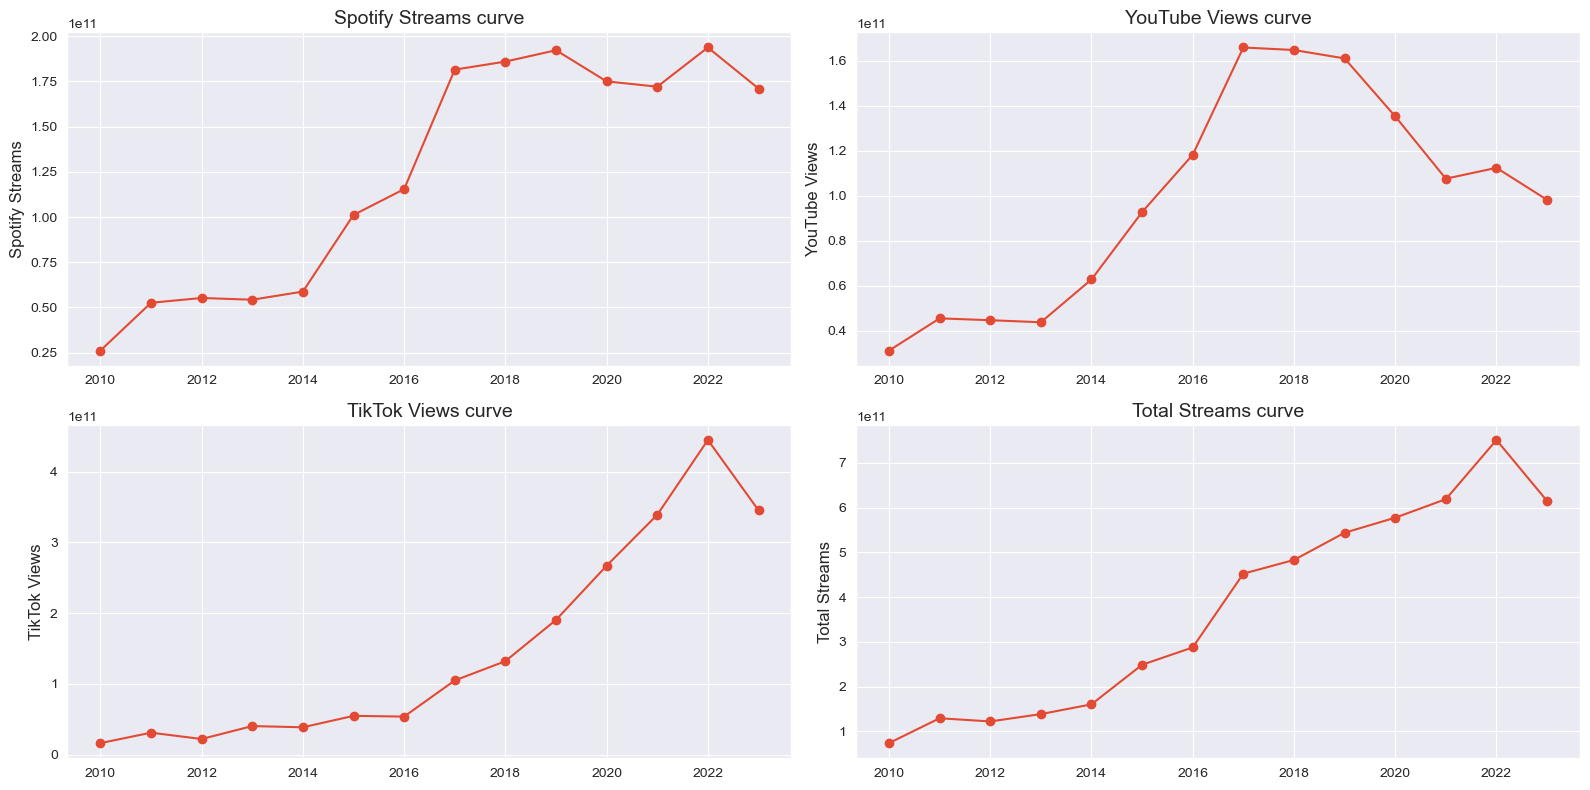

In [37]:
fig,ax=plt.subplots(figsize=(16,8),ncols=2,nrows=2)
ax[0,0].plot(yr['year'],yr['Spotify_Streams'],marker='o')
ax[0,0].set_ylabel('Spotify Streams')
ax[0,0].set_title('Spotify Streams curve',fontsize=14)

ax[0,1].plot(yr['year'],yr['YouTube_Views'],marker='o')
ax[0,1].set_ylabel('YouTube Views')
ax[0,1].set_title('YouTube Views curve',fontsize=14)

ax[1,0].plot(yr['year'],yr['TikTok_Views'],marker='o')
ax[1,0].set_ylabel('TikTok Views')
ax[1,0].set_title('TikTok Views curve',fontsize=14)

ax[1,1].plot(yr['year'],yr['Total_Streams'],marker='o')
ax[1,1].set_ylabel('Total Streams')
ax[1,1].set_title('Total Streams curve',fontsize=14)

plt.tight_layout()
plt.show()

##### Conclusion - 
###### Platform Maturity: Both Spotify and YouTube show signs of maturity with initial rapid growth followed by stabilization and minor fluctuations.
###### Emerging Platform: TikTok, as a newer platform, demonstrates rapid growth more recently but also shows high volatility, which could be due to its evolving nature and changes in user engagement.
###### Market Trends: The combined total streams reflect broader market trends in digital media consumption, showing how different platforms contribute to overall streaming activity over time.

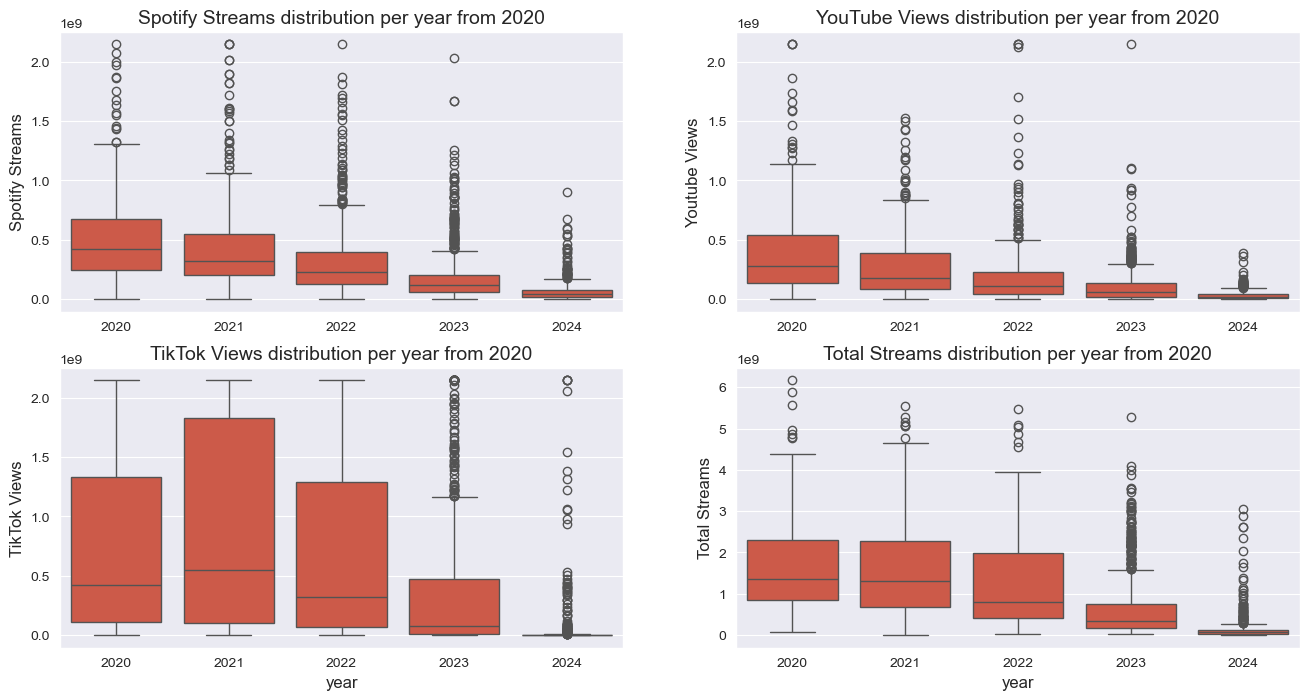

In [38]:
yrdist=df.loc[df['year']>2019]
fig,ax=plt.subplots(figsize=(16,8),ncols=2,nrows=2)

sns.boxplot(x='year',y='Spotify_Streams',data=yrdist,ax=ax[0,0])
ax[0,0].set_ylabel('Spotify Streams')
ax[0,0].set_xlabel(None)
ax[0,0].set_title('Spotify Streams distribution per year from 2020',fontsize=14)


sns.boxplot(x='year',y='YouTube_Views',data=yrdist,ax=ax[0,1])
ax[0,1].set_ylabel('Youtube Views')
ax[0,1].set_xlabel(None)
ax[0,1].set_title('YouTube Views distribution per year from 2020',fontsize=14)

sns.boxplot(x='year',y='TikTok_Views',data=yrdist,ax=ax[1,0])
ax[1,0].set_ylabel('TikTok Views')
ax[1,0].set_title('TikTok Views distribution per year from 2020',fontsize=14)

sns.boxplot(x='year',y='Total_Streams',data=yrdist,ax=ax[1,1])
ax[1,1].set_ylabel('Total Streams')
ax[1,1].set_title('Total Streams distribution per year from 2020',fontsize=14)

plt.show()

##### Conclusion
###### Consistency and Stability (2020-2022): All platforms show relatively stable distributions from 2020 to 2022, with some variability as indicated by the IQR and outliers.
###### Decline in Activity (2023-2024): There is a noticeable decline in the median, distribution, and number of outliers across all platforms from 2023 onwards. This could be due to several factors such as market saturation, changes in user behavior, competition from new platforms, or shifts in content consumption trends.
###### Outliers: The presence of high outliers in the earlier years indicates occasional spikes in user engagement or viral content, while the reduced number of outliers in later years suggests less variability and fewer peak events.

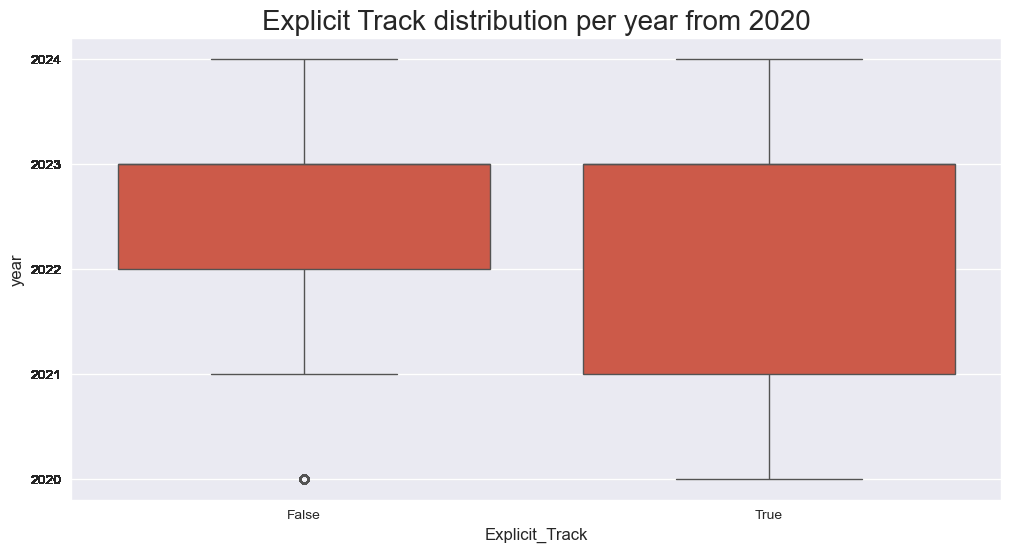

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='Explicit_Track',y='year',data=yrdist,ax=ax)
ax.set_title('Explicit Track distribution per year from 2020',fontsize=20)
plt.yticks(yrdist['year'],fontstyle='normal')

plt.show()

##### Increasing Trend: There is a clear upward trend in the distribution of explicit tracks from 2020 to 2024. This suggests that explicit content has become more prevalent over these years.
##### Variation in 2022-2024: The wider distributions in 2022, 2023, and 2024 indicate greater variability and a larger volume of explicit tracks compared to the earlier years.

In [40]:
numericalcol=[]
for col in df.columns:
    if df[col].dtype not in ['object', 'category', 'datetime64[ns]']:
        numericalcol.append(col)
numericalcol

['year',
 'Track_Score',
 'Spotify_Streams',
 'Spotify_Playlist_Count',
 'Spotify_Playlist_Reach',
 'Spotify_Popularity',
 'YouTube_Views',
 'YouTube_Likes',
 'TikTok_Posts',
 'TikTok_Likes',
 'TikTok_Views',
 'YouTube_Playlist_Reach',
 'Apple_Music_Playlist_Count',
 'Deezer_Playlist_Count',
 'Deezer_Playlist_Reach',
 'Total_Streams',
 'Playlists_Count']

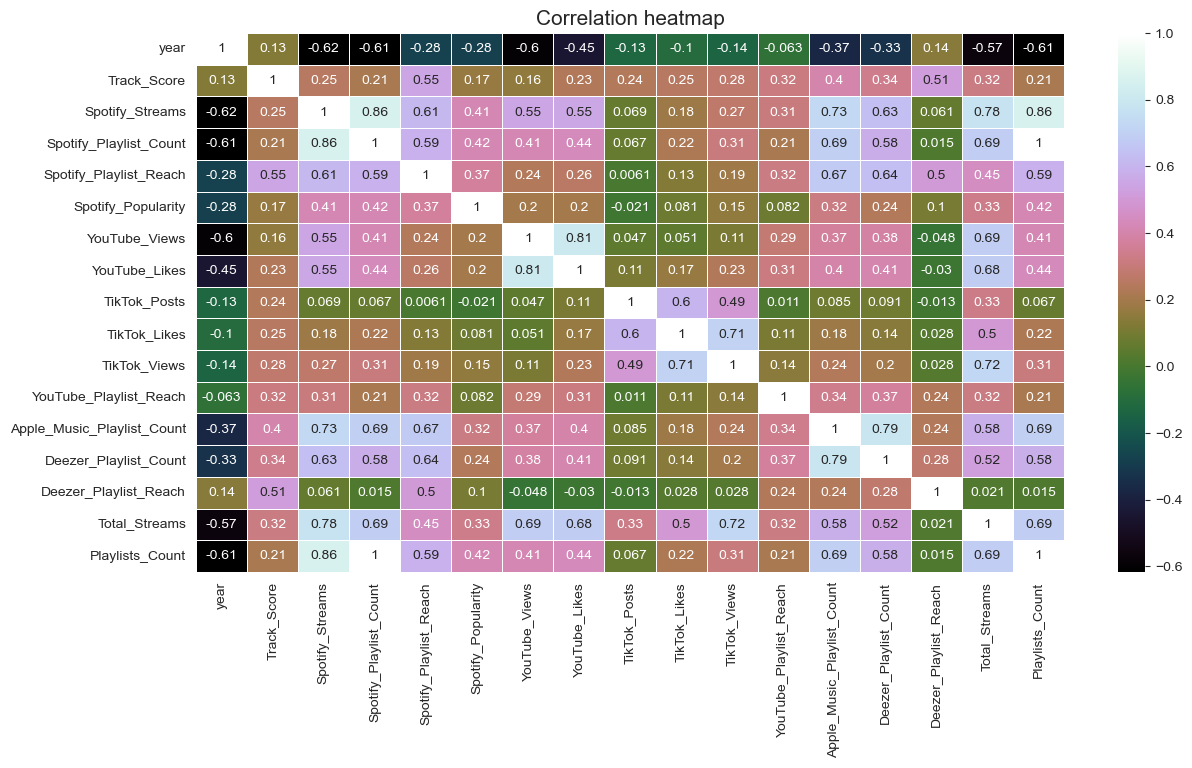

In [41]:
cor=df[numericalcol].corr()
plt.figure(figsize=(14,7))
sns.heatmap(cor,annot=True,lw=0.5,cmap='cubehelix')
plt.title('Correlation heatmap',fontsize=15)
plt.show()

##### Strong correlation between streaming metrics:
###### There's a high positive correlation (0.86) between Spotify_Streams and Spotify_Playlist_Count, as well as with Total_Streams (0.78). This suggests that songs appearing on more Spotify playlists tend to have higher stream counts, both on Spotify and overall.
##### Negative correlation between year and popularity metrics:
###### The "year" variable shows negative correlations with most popularity metrics, including Spotify_Streams (-0.62), YouTube_Views (-0.6), and Total_Streams (-0.57). This implies that older songs (lower year values) tend to have higher streaming numbers and views, possibly indicating a bias towards established hits or classic tracks.

In [50]:
s24=df[df['year']>2023]
s24.drop_duplicates(subset='Track',inplace=True)
s24.duplicated(subset='Track').sum()

0

In [51]:
top10sp=s24.sort_values(by='Spotify_Streams',ascending=False).head(10)
top10sp

,Track,Album_Name,Artist,Release_Date,year,month,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Explicit_Track,Total_Streams,Playlists_Count
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,2024,January,407,900158751,73118,201585714,86,308723145,4120760,0,29584940,534915313,2147483648,280,168,48197850,False,1743797209,73566
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,2024,February,375,675079153,40094,211236940,92,228382568,1439495,3500000,338546668,2147483648,2112581620,160,87,33245595,True,3050945369,40341
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,2024,March,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,2147483648,373784955,190,136,36321847,False,2871392047,54657
28,we can't be friends (wait for your love),eternal sunshine,Ariana Grande,2024-03-08,2024,March,262,591068364,26203,197494995,87,156882014,3080503,0,0,0,578568464,194,117,22062193,False,747950378,26514
21,Espresso,Espresso,Sabrina Carpenter,2024-04-12,2024,April,281,547882871,24425,262343414,95,107550212,1825761,209200,169144295,1379499000,422646034,298,167,41414565,True,2034932083,24890
34,Too Sweet,Unreal Unearth: Unheard,Hozier,2024-03-22,2024,March,231,532012790,23557,67488850,0,62123098,923733,0,0,0,384716227,221,42,658517,False,594135888,23820
66,CARNIVAL,CARNIVAL,ýý$,2024-02-08,2024,February,179,466887055,53842,103935623,84,27688666,449112,0,0,0,33817299,42,11,199915,True,494575721,53895
86,redrum,american dream,21 Savage,2024-01-12,2024,January,164,428233003,57311,144298748,0,105148629,1762297,87200,6732800,43993800,977638660,74,48,4037475,True,577375432,57433
23,TEXAS HOLD 'EM,TEXAS HOLD 'EM,Beyoncï¿,2024-02-10,2024,February,278,426700979,34044,152928632,86,35724356,437980,1470500,485200392,2147483648,1213175656,159,194,40725482,True,2609908983,34397
198,"yes, and?","yes, and?",Ariana Grande,2024-01-12,2024,January,107,416813996,22468,101875097,0,115105080,2893111,77900,5912130,10072539,2147483648,106,87,6747701,True,541991615,22661


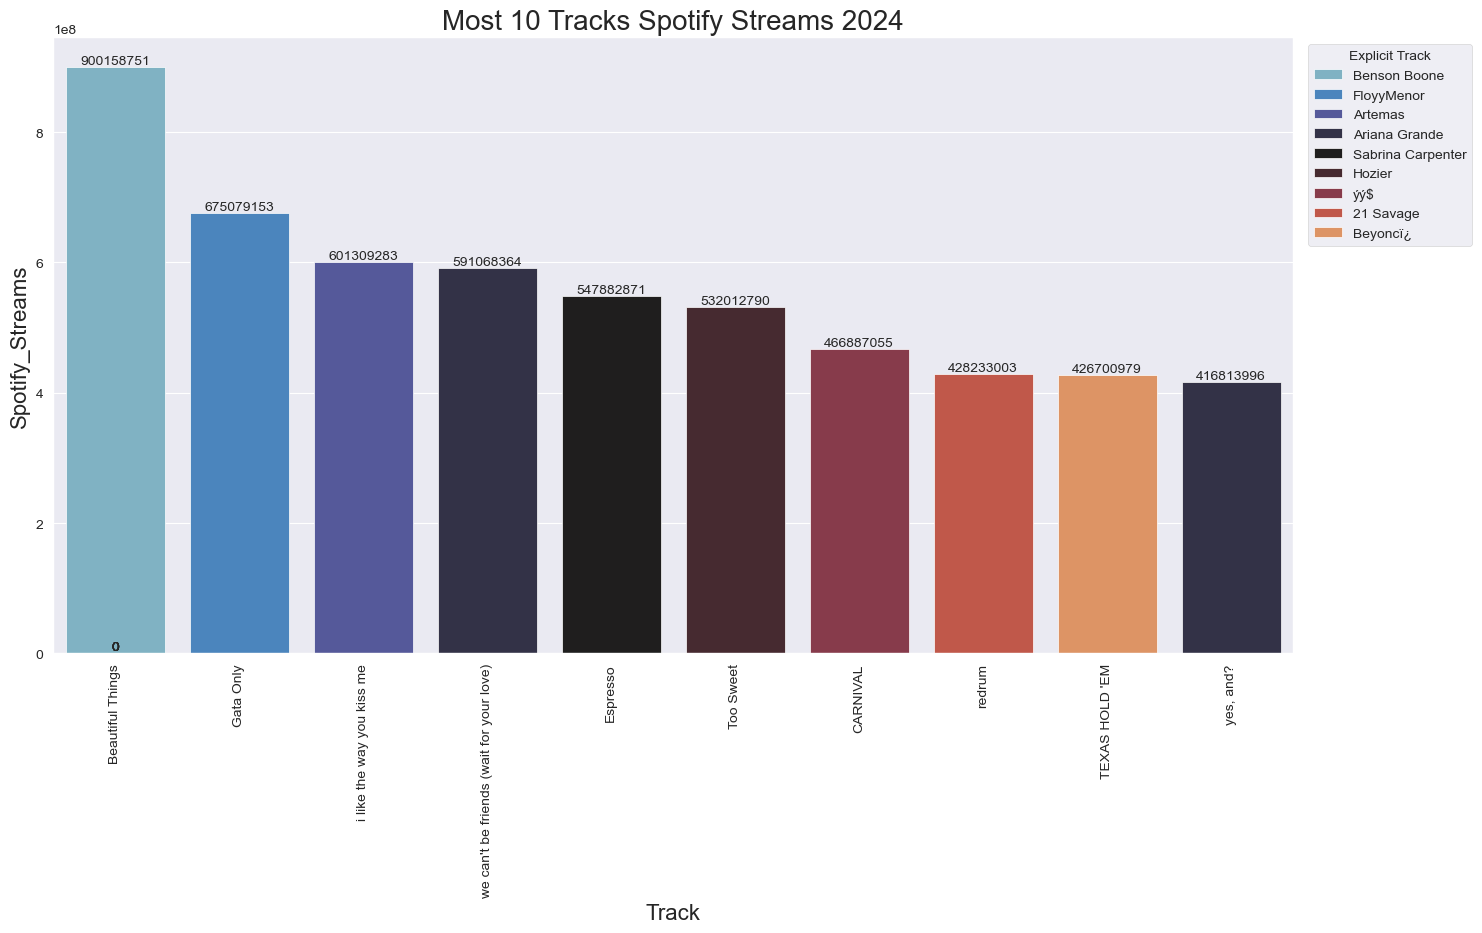

In [58]:
plt.figure(figsize=(16,8))
ax=sns.barplot(x='Track',y='Spotify_Streams',data=top10sp,palette='icefire',hue='Artist')
plt.xlabel('Track',fontsize=16)
plt.ylabel('Spotify_Streams',fontsize=16)
plt.title('Most 10 Tracks Spotify Streams 2024',fontsize=20)
plt.legend(title='Explicit Track', loc='upper right',bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2,i.get_height()+20,str(int(i.get_height())),ha='center',va='bottom')

###### We can see that the most listened track is Beautiful Things for benson boone with a noticeable difference between it and all the tracks.

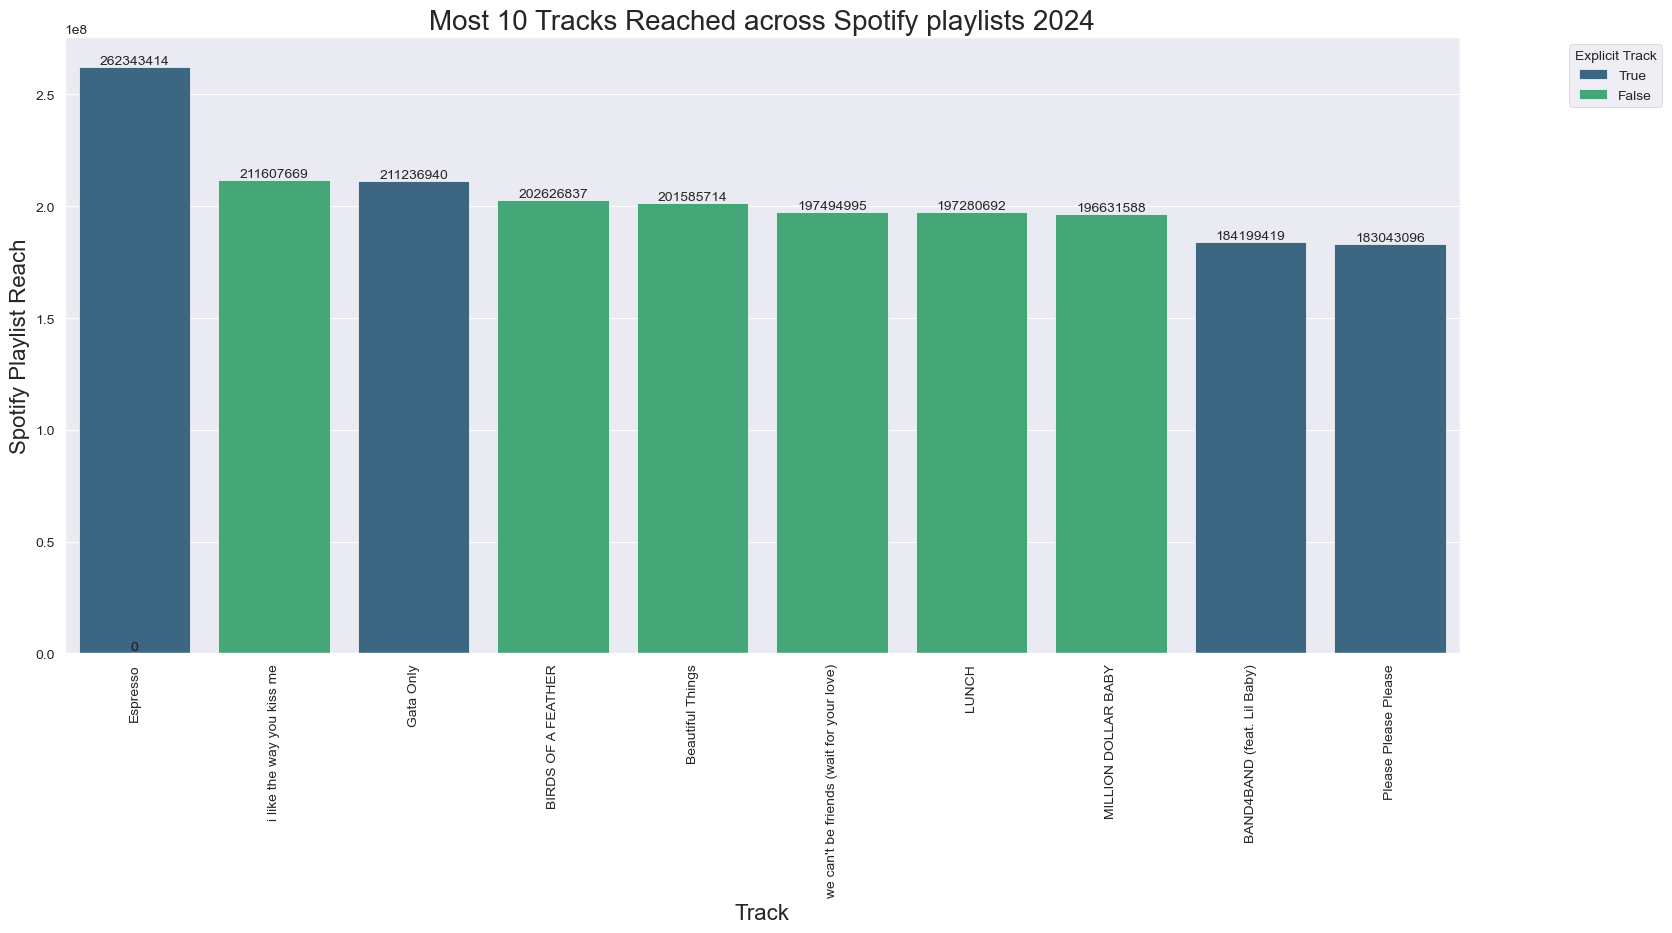

In [68]:
top10reach=s24.sort_values(by='Spotify_Playlist_Reach',ascending=False).head(10)
plt.figure(figsize=(18,8))
ax=sns.barplot(x='Track',y='Spotify_Playlist_Reach',data=top10reach,palette='viridis',hue='Explicit_Track')
plt.xlabel('Track',fontsize=16)
plt.ylabel('Spotify Playlist Reach',fontsize=16)
plt.title('Most 10 Tracks Reached across Spotify playlists 2024',fontsize=20)
plt.legend(title='Explicit Track', loc='upper right',bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2,i.get_height()+20,str(int(i.get_height())),ha='center',va='bottom')

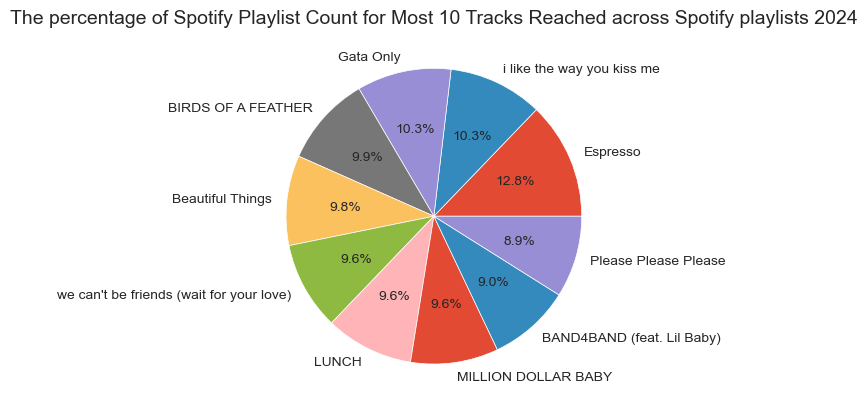

In [67]:
plt.pie(top10reach['Spotify_Playlist_Reach'],labels=top10reach['Track'],autopct='%1.1f%%')
plt.title('The percentage of Spotify Playlist Count for Most 10 Tracks Reached across Spotify playlists 2024',fontsize=14)
plt.show()

###### We can see that the most accessed track across playlists is Espresso.

In [73]:
top10artist=s24.groupby('Artist',as_index=False)['Spotify_Streams'].agg(sum)
top10artist=top10artist.sort_values(by='Spotify_Streams',ascending=False).head(10)
top10artist

,Artist,Spotify_Streams
298,Taylor Swift,3012162897
21,Ariana Grande,1640118356
40,Benson Boone,1175778682
43,Billie Eilish,1158628017
3,21 Savage,1009128770
110,Future,1001848306
104,FloyyMenor,708325051
41,Beyoncï¿,617147900
274,Sabrina Carpenter,607197312
22,Artemas,601309283


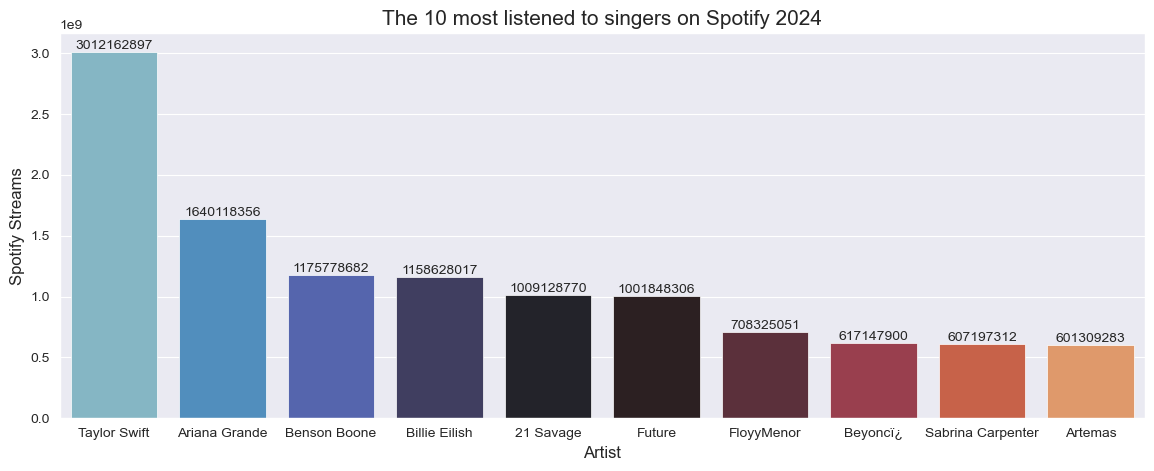

In [75]:
plt.figure(figsize=(14,5))
sns.barplot(x='Artist',y='Spotify_Streams',palette='icefire',data=top10artist)
plt.xlabel('Artist',fontsize=12)
plt.ylabel('Spotify Streams',fontsize=12)
plt.title('The 10 most listened to singers on Spotify 2024',fontsize=15)

for index, value in enumerate(top10artist['Spotify_Streams']):
    plt.text(index,value,f'{value}',ha='center',va='bottom')

plt.show()

##### We can see that the most listened artist is Taylor Swift with a noticeable difference between it and all the artists.

In [78]:
melt=pd.melt(top10sp,id_vars='Track',value_vars=['Track_Score','Spotify_Popularity'],var_name='Score_Popularity',value_name='count')
melt

,Track,Score_Popularity,count
0,Beautiful Things,Track_Score,407
1,Gata Only,Track_Score,375
2,i like the way you kiss me,Track_Score,538
3,we can't be friends (wait for your love),Track_Score,262
4,Espresso,Track_Score,281
5,Too Sweet,Track_Score,231
6,CARNIVAL,Track_Score,179
7,redrum,Track_Score,164
8,TEXAS HOLD 'EM,Track_Score,278
9,"yes, and?",Track_Score,107


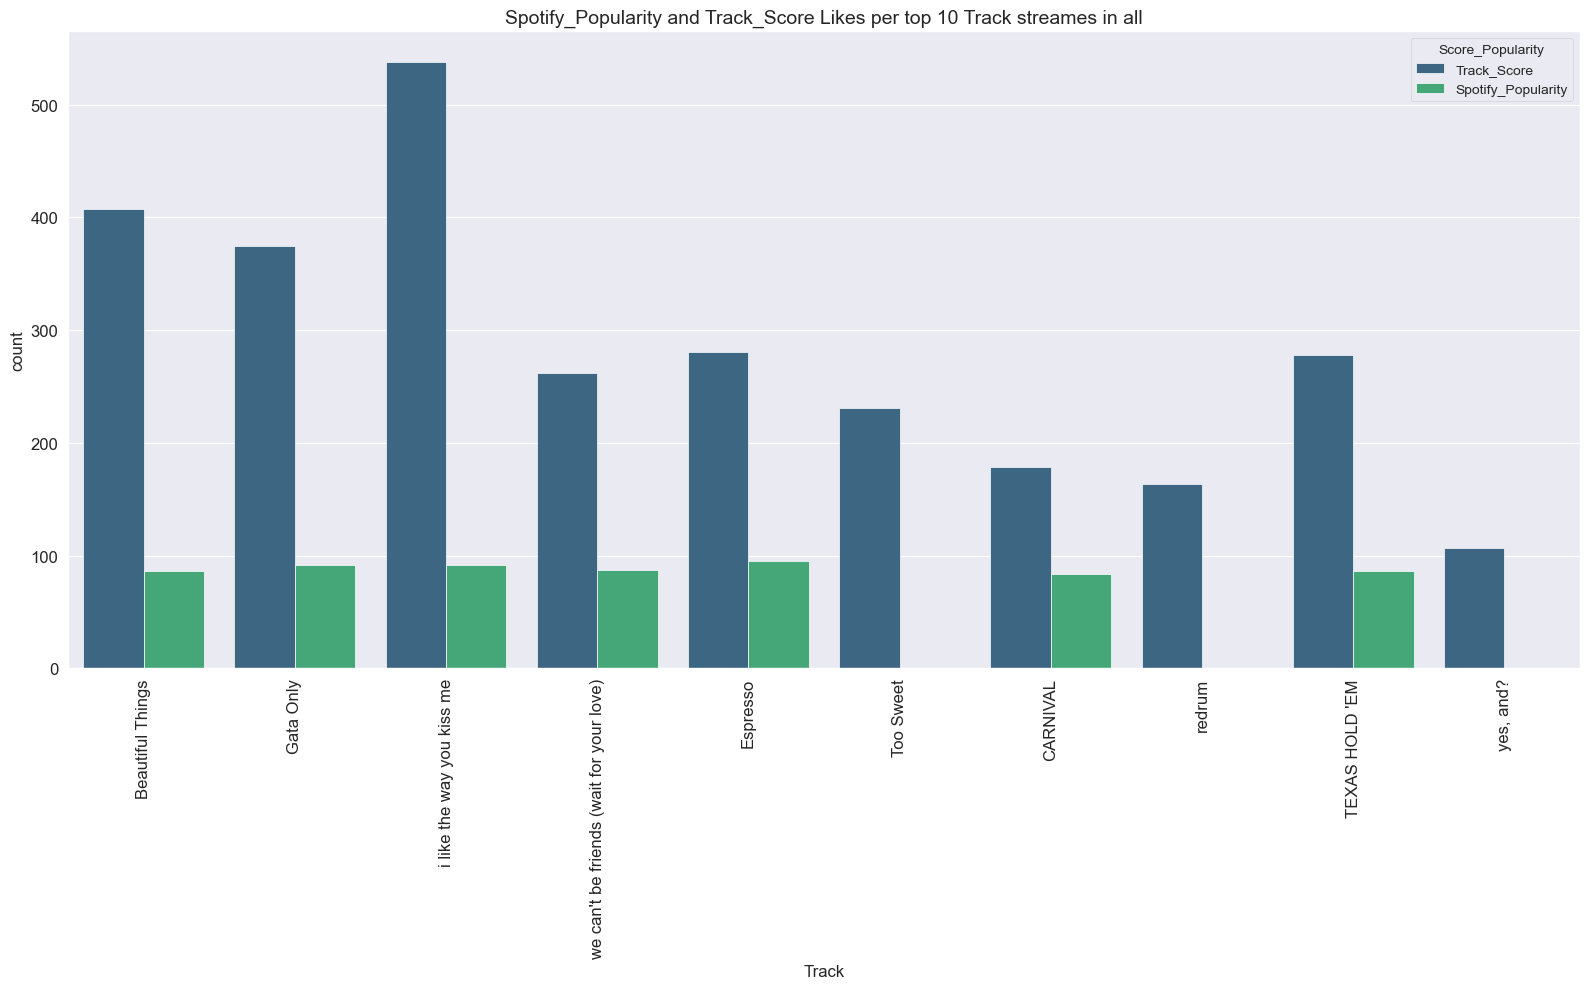

In [82]:
plt.figure(figsize=(16,10))
sns.barplot(x='Track',y='count',data=melt,palette='viridis',hue='Score_Popularity')
plt.title('Spotify_Popularity and Track_Score Likes per top 10 Track streames in all',fontsize=14)
plt.xlabel('Track',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

##### This suggests that while tracks may score high based on certain criteria, this does not necessarily align with their popularity on Spotify.

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


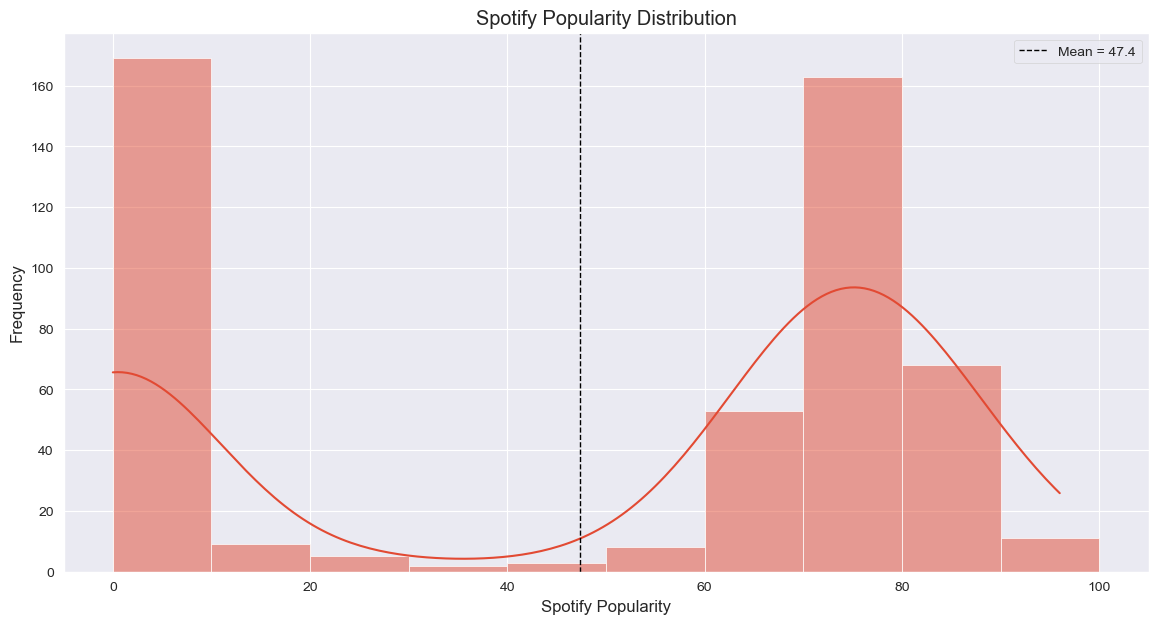

In [98]:
plt.figure(figsize=(14,7))
bins=list(range(0,101,10))
print(bins)
sns.histplot(s24['Spotify_Popularity'],kde=True,bins=bins)
plt.axvline(s24['Spotify_Popularity'].mean(), color='black', linestyle='--', linewidth=1,label = f'Mean = {s24.Spotify_Popularity.mean().round(2)}')
plt.ylabel('Frequency')
plt.xlabel('Spotify Popularity')
plt.title('Spotify Popularity Distribution')
plt.legend()
plt.show()

##### The histogram reveals a bimodal distribution of Spotify popularity, with a high number of low-popularity tracks and a significant number of high-popularity tracks.

In [100]:
month24=s24.groupby('month',as_index=False)['Spotify_Streams'].agg(sum).sort_values(by='Spotify_Streams',ascending=False)
month24

,month,Spotify_Streams
4,March,8074699415
0,April,8054567108
1,February,7461292515
2,January,6174249143
5,May,3950697867
3,June,157579844


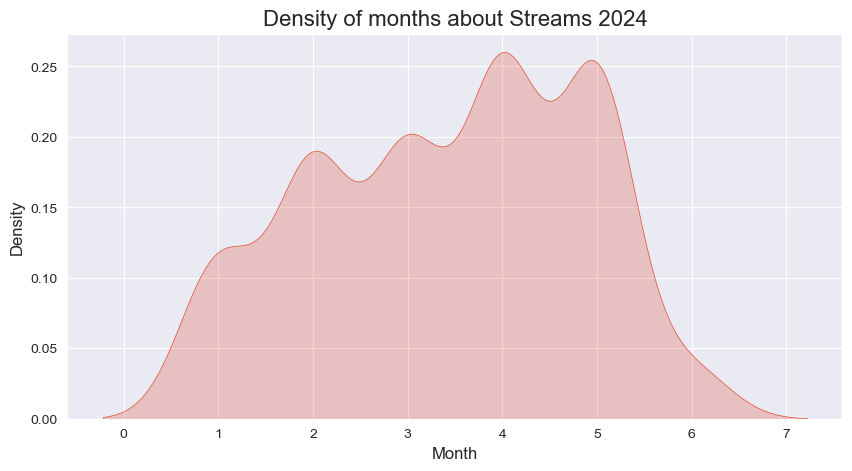

In [106]:
plt.figure(figsize=(10,5))
sns.kdeplot(s24['Release_Date'].dt.month,fill=True)
plt.xlabel('Month')
plt.title('Density of months about Streams 2024', fontsize = 16)
plt.show()

##### Peak Months: The streaming activity is highest between the 2nd and 5th months, with notable peaks around the 4th month. This indicates increased user engagement during this period.
##### Early Year Growth: There is a gradual increase in streams from the start of the year, peaking towards the middle months.
##### Mid-Year Decline: After the 5th month, there is a noticeable decline in the number of streams.

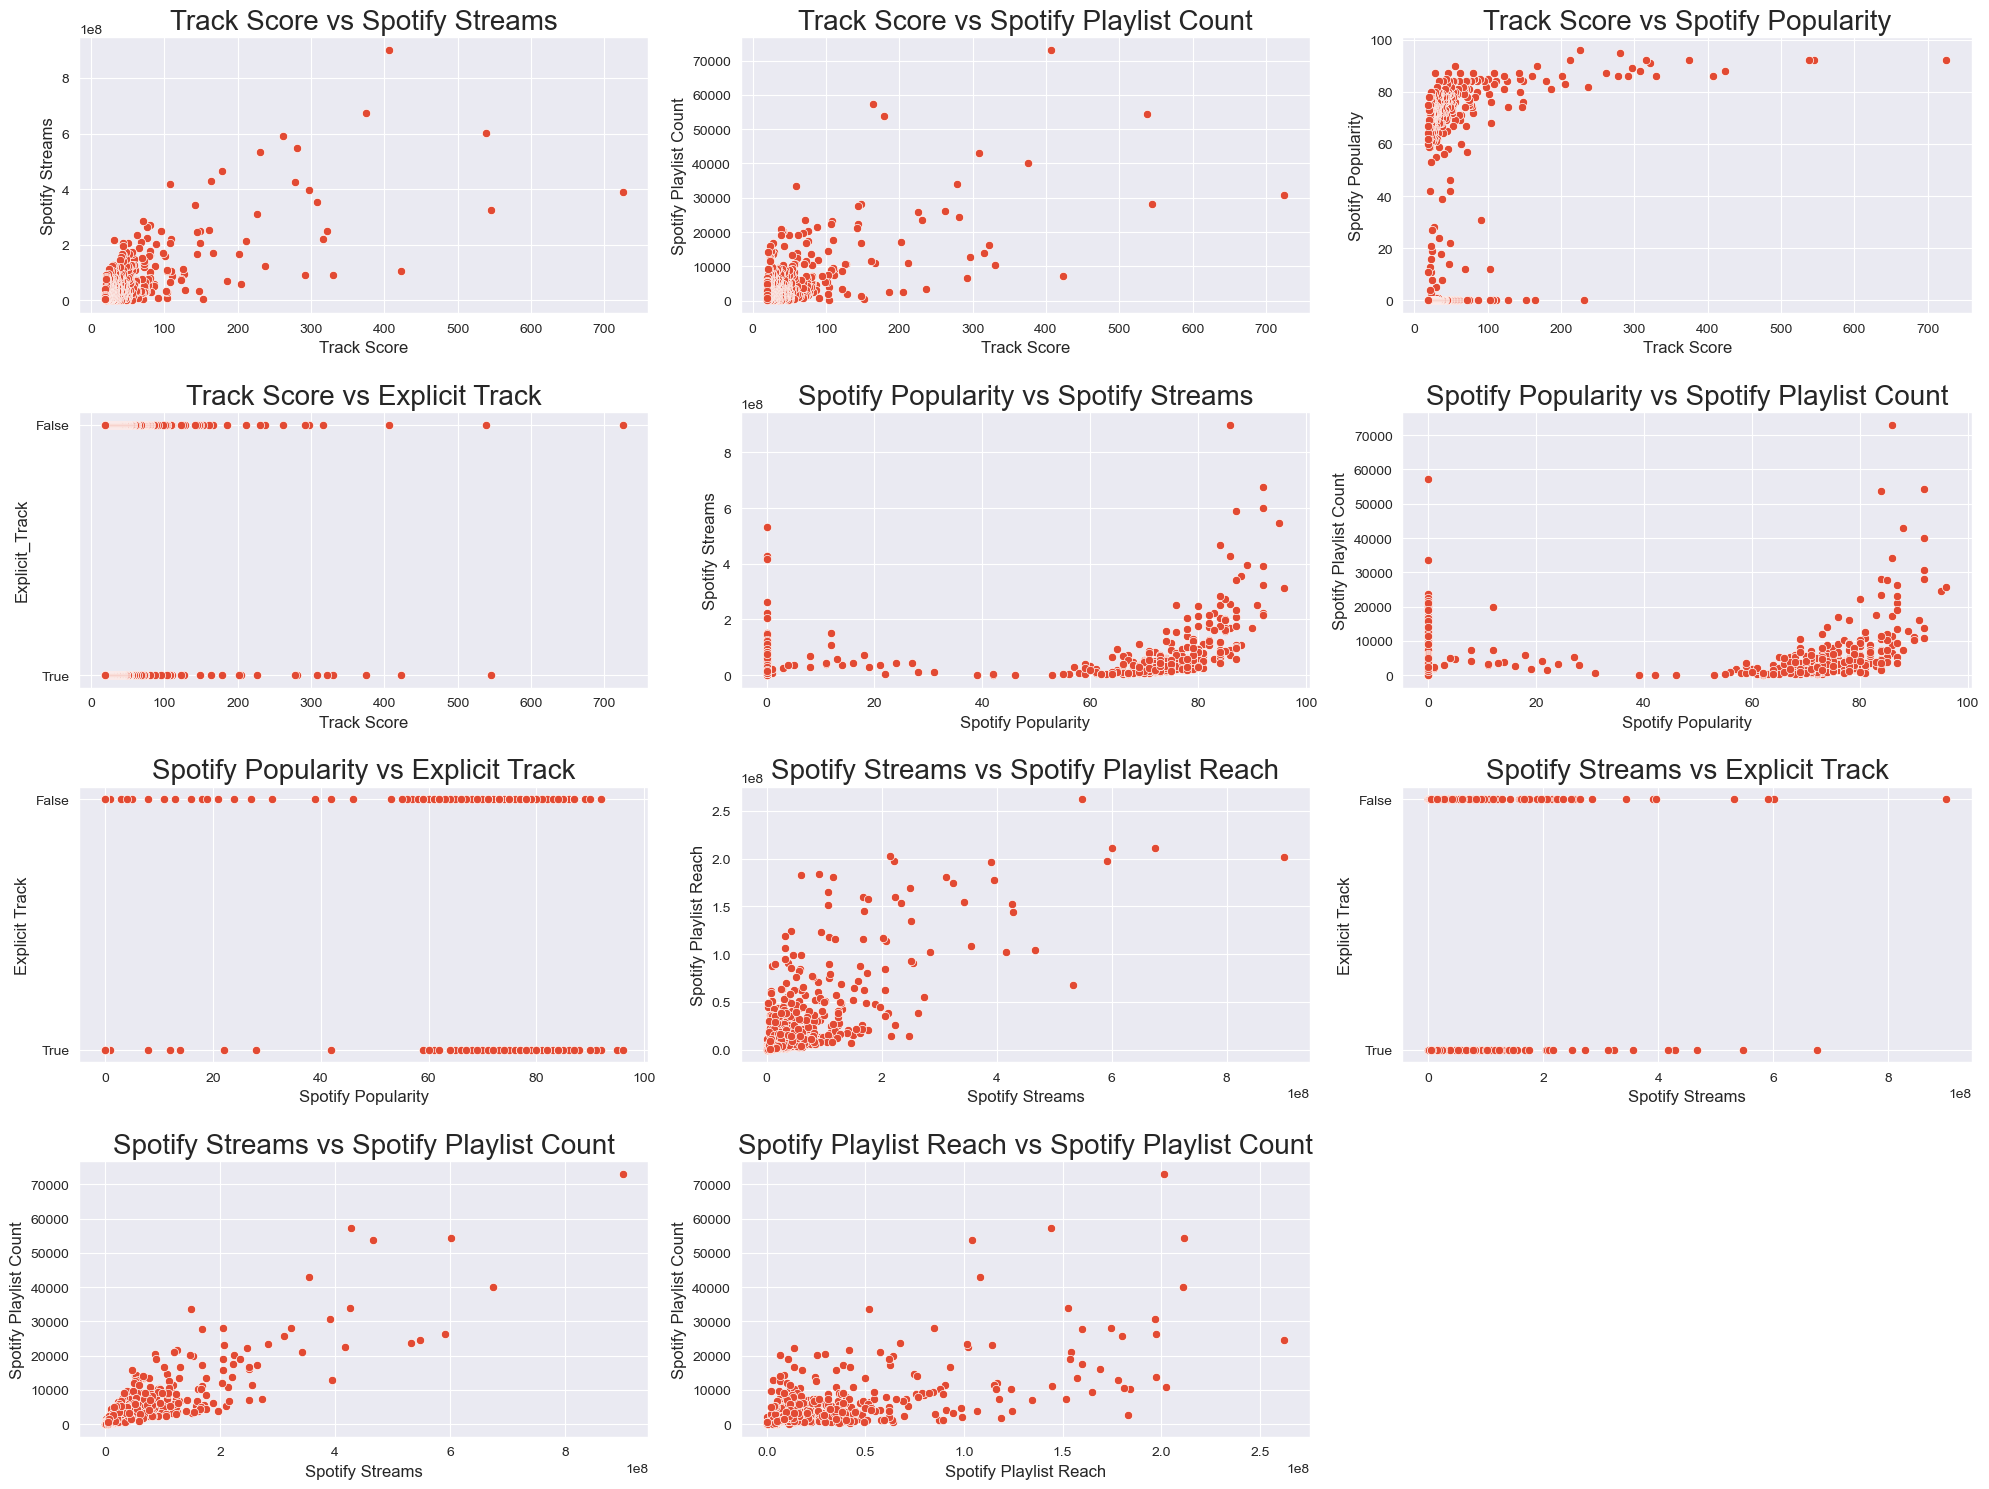

In [109]:
fig, ax = plt.subplots(figsize=(20,15),nrows=4,ncols=3)
sns.scatterplot(x='Track_Score',y='Spotify_Streams',data=s24,ax=ax[0,0])
ax[0,0].set_xlabel('Track Score')
ax[0,0].set_ylabel('Spotify Streams')
ax[0,0].set_title('Track Score vs Spotify Streams',fontsize=20)

sns.scatterplot(x='Track_Score', y='Spotify_Playlist_Count', data=s24,ax=ax[0,1])
ax[0,1].set_xlabel('Track Score')
ax[0,1].set_ylabel('Spotify Playlist Count')
ax[0,1].set_title('Track Score vs Spotify Playlist Count',fontsize=20)


sns.scatterplot(x='Track_Score', y='Spotify_Popularity', data=s24,ax=ax[0,2])
ax[0,2].set_xlabel('Track Score')
ax[0,2].set_ylabel('Spotify Popularity')
ax[0,2].set_title('Track Score vs Spotify Popularity',fontsize=20)


sns.scatterplot(x='Track_Score', y='Explicit_Track', data=s24,ax=ax[1,0])
ax[1,0].set_xlabel('Track Score')
ax[1,0].set_ylabel('Explicit_Track')
ax[1,0].set_title('Track Score vs Explicit Track',fontsize=20)


sns.scatterplot(x='Spotify_Popularity', y='Spotify_Streams', data=s24,ax=ax[1,1])
ax[1,1].set_xlabel('Spotify Popularity')
ax[1,1].set_ylabel('Spotify Streams')
ax[1,1].set_title('Spotify Popularity vs Spotify Streams',fontsize=20)

sns.scatterplot(x='Spotify_Popularity', y='Spotify_Playlist_Count', data=s24,ax=ax[1,2])
ax[1,2].set_xlabel('Spotify Popularity')
ax[1,2].set_ylabel('Spotify Playlist Count')
ax[1,2].set_title('Spotify Popularity vs Spotify Playlist Count',fontsize=20)


sns.scatterplot(x='Spotify_Popularity', y='Explicit_Track', data=s24,ax=ax[2,0])
ax[2,0].set_xlabel('Spotify Popularity')
ax[2,0].set_ylabel('Explicit Track')
ax[2,0].set_title('Spotify Popularity vs Explicit Track',fontsize=20)


sns.scatterplot(x='Spotify_Streams', y='Spotify_Playlist_Reach', data=s24,ax=ax[2,1])
ax[2,1].set_xlabel('Spotify Streams')
ax[2,1].set_ylabel('Spotify Playlist Reach')
ax[2,1].set_title('Spotify Streams vs Spotify Playlist Reach',fontsize=20)


sns.scatterplot(x='Spotify_Streams', y='Explicit_Track', data=s24,ax=ax[2,2])
ax[2,2].set_xlabel('Spotify Streams')
ax[2,2].set_ylabel('Explicit Track')
ax[2,2].set_title('Spotify Streams vs Explicit Track',fontsize=20)

sns.scatterplot(x='Spotify_Streams', y='Spotify_Playlist_Count', data=s24,ax=ax[3,0])
ax[3,0].set_xlabel('Spotify Streams')
ax[3,0].set_ylabel('Spotify Playlist Count')
ax[3,0].set_title('Spotify Streams vs Spotify Playlist Count',fontsize=20)


sns.scatterplot(x='Spotify_Playlist_Reach', y='Spotify_Playlist_Count', data=s24,ax=ax[3,1])
ax[3,1].set_xlabel('Spotify Playlist Reach')
ax[3,1].set_ylabel('Spotify Playlist Count')
ax[3,1].set_title('Spotify Playlist Reach vs Spotify Playlist Count',fontsize=20)

ax[3, 2].axis('off')

plt.tight_layout()


Track Score vs Spotify Streams:
-Higher track scores generally correlate with more Spotify streams, but there's considerable variability.

Track Score vs Spotify Playlist Count:
-Higher track scores tend to correlate with higher Spotify playlist counts, suggesting that well-scored tracks are more frequently added to playlists.

Track Score vs Spotify Popularity:
-There is a strong positive correlation between track score and Spotify popularity, indicating that higher-scoring tracks are generally more popular.

Track Score vs Explicit Track:
-There is no clear correlation between track score and whether a track is explicit.

Spotify Popularity vs Spotify Streams:
-Higher Spotify popularity is strongly correlated with more streams.

Spotify Popularity vs Spotify Playlist Count:
-Higher popularity is associated with more playlist inclusions, indicating popular tracks are widely added to playlists.

Spotify Popularity vs Explicit Track:
-No clear correlation between popularity and explicit content.

Spotify Streams vs Spotify Playlist Reach:
-Higher number of streams is associated with greater playlist reach, indicating tracks with many streams are often included in more playlists with broader reach.

Spotify Streams vs Explicit Track:
-There is no clear correlation between the number of streams and whether a track is explicit.

Spotify Streams vs Spotify Playlist Count:
-More streams are associated with higher playlist counts, indicating widely streamed tracks are added to many playlists.

Spotify Playlist Reach vs Spotify Playlist Count:
-There is a strong positive correlation between playlist reach and playlist count, suggesting tracks included in more playlists tend to reach wider audiences.